### Problem Statement - 
CredX is a leading credit card provider that gets thousands of credit card applications every year. But in the past few years, it has experienced an increase in credit loss. The CEO believes that the best strategy to mitigate credit risk is to ‘acquire the right customers’.<br/>
<b>Main Objective -</b> Help CredX identify the right customers using predictive models

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To ignore warnings
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# EDA 
## Step 1 - Data Sourcing 
#### We load data collected to perform analysis

In [2]:
# Credit Bureau dataset
cData = pd.read_csv("Credit Bureau data.csv")

# Demographic Dataset
dData = pd.read_csv("Demographic data.csv")

In [3]:
# Credit Bureau Dimensions
cData.shape

(71295, 19)

In [4]:
# Demographic Dimensions
dData.shape

(71295, 12)

We can notice we have 71295 rows in both dataset.

In [5]:
# What type of values are stored in the columns?
cData.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 19 columns):
Application ID                                                     71295 non-null int64
No of times 90 DPD or worse in last 6 months                       71295 non-null int64
No of times 60 DPD or worse in last 6 months                       71295 non-null int64
No of times 30 DPD or worse in last 6 months                       71295 non-null int64
No of times 90 DPD or worse in last 12 months                      71295 non-null int64
No of times 60 DPD or worse in last 12 months                      71295 non-null int64
No of times 30 DPD or worse in last 12 months                      71295 non-null int64
Avgas CC Utilization in last 12 months                             70237 non-null float64
No of trades opened in last 6 months                               71294 non-null float64
No of trades opened in last 12 months                              71295 non-null int64
No of P

### Simplifying Column Names 

In [6]:
cData.columns

Index(['Application ID', 'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 6 months',
       'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'Presence of open home loan', 'Outstanding Balance',
       'Total No of Trades', 'Presence of open auto loan', 'Performance Tag'],
      dtype='object')

In [7]:
cData.columns = ['AID', 'NUM_90DPD_INLAS6M',
       'NUM_60DPD_INLAS6M',
       'NUM_30DPD_INLAS6M',
       'NUM_90DPD_INLAS12M',
       'NUM_60DPD_INLAS12M',
       'NUM_30DPD_INLAS12M',
       'AVG_CC_UTIL_INLAS12M',
       'NUM_TRAD_LAS6M',
       'NUM_TRAD_LAS12M',
       'NUM_PL_TRAD_LAS6M',
       'NUM_PL_TRAD_LAS12M',
       'NUM_OF_INQ_LAS6M',
       'NUM_OF_INQ_LAS12M',
       'PRSNC_OPN_HOME_LOAN', 'OUT_BAL',
       'TOT_NUM_TRD', 'PRSNC_OPN_AUTO_LOAN', 'PERF_TAG']

In [8]:
dData.columns

Index(['Application ID', 'Age', 'Gender',
       'Marital Status (at the time of application)', 'No of dependents',
       'Income', 'Education', 'Profession ', 'Type of residence',
       'No of months in current residence', 'No of months in current company',
       'Performance Tag'],
      dtype='object')

In [9]:
dData.columns =['AID', 'AGE', 'GENDER',
       'MARITAL_STATUS', 'NUM_OF_DEPTS',
       'INCOME', 'EDUCATION', 'PROFESSION', 'TYPE_OF_RES',
       'NUM_OF_MONTHS_CURR_RES', 'NUM_OF_MONTHS_CURR_COMP',
       'PERF_TAG']

### Credit and Demographics Data

In [10]:
# What type of values are stored in the columns?
dData.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 12 columns):
AID                        71295 non-null int64
AGE                        71295 non-null int64
GENDER                     71293 non-null object
MARITAL_STATUS             71289 non-null object
NUM_OF_DEPTS               71292 non-null float64
INCOME                     71295 non-null float64
EDUCATION                  71176 non-null object
PROFESSION                 71281 non-null object
TYPE_OF_RES                71287 non-null object
NUM_OF_MONTHS_CURR_RES     71295 non-null int64
NUM_OF_MONTHS_CURR_COMP    71295 non-null int64
PERF_TAG                   69870 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 6.5+ MB


In [11]:
# Check the summary of the dataset
cData.describe(include='all')

,AID,NUM_90DPD_INLAS6M,NUM_60DPD_INLAS6M,NUM_30DPD_INLAS6M,NUM_90DPD_INLAS12M,NUM_60DPD_INLAS12M,NUM_30DPD_INLAS12M,AVG_CC_UTIL_INLAS12M,NUM_TRAD_LAS6M,NUM_TRAD_LAS12M,NUM_PL_TRAD_LAS6M,NUM_PL_TRAD_LAS12M,NUM_OF_INQ_LAS6M,NUM_OF_INQ_LAS12M,PRSNC_OPN_HOME_LOAN,OUT_BAL,TOT_NUM_TRD,PRSNC_OPN_AUTO_LOAN,PERF_TAG
count,7.129500e+04,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,70237.000000,71294.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71023.000000,7.102300e+04,71295.000000,71295.000000,69870.000000
mean,4.989601e+08,0.270313,0.430535,0.577207,0.450340,0.655488,0.800912,29.696926,2.298048,5.826888,1.206901,2.397447,1.763532,3.535241,0.256424,1.249163e+06,8.186633,0.084620,0.042193
std,2.885905e+08,0.534166,0.825334,1.074436,0.808387,1.089535,1.331940,29.533308,2.070191,5.065096,1.352936,2.420086,1.971294,3.582199,0.436662,1.278874e+06,7.090776,0.278318,0.201030
min,1.004500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2.483719e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.115320e+05,3.000000,0.000000,0.000000
50%,4.975698e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,5.000000,1.000000,2.000000,1.000000,3.000000,0.000000,7.749920e+05,6.000000,0.000000,0.000000
75%,7.495868e+08,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,46.000000,3.000000,9.000000,2.000000,4.000000,3.000000,5.000000,1.000000,2.920796e+06,10.000000,0.000000,0.000000
max,1.000084e+09,3.000000,5.000000,7.000000,5.000000,7.000000,9.000000,113.000000,12.000000,28.000000,6.000000,12.000000,10.000000,20.000000,1.000000,5.218801e+06,44.000000,1.000000,1.000000


In [12]:
# Check the summary of the dataset
dData.describe(include='all')

,AID,AGE,GENDER,MARITAL_STATUS,NUM_OF_DEPTS,INCOME,EDUCATION,PROFESSION,TYPE_OF_RES,NUM_OF_MONTHS_CURR_RES,NUM_OF_MONTHS_CURR_COMP,PERF_TAG
count,7.129500e+04,71295.000000,71293,71289,71292.000000,71295.000000,71176,71281,71287,71295.000000,71295.000000,69870.000000
unique,NaN,NaN,2,2,NaN,NaN,5,3,5,NaN,NaN,NaN
top,NaN,NaN,M,Married,NaN,NaN,Professional,SAL,Rented,NaN,NaN,NaN
freq,NaN,NaN,54456,60730,NaN,NaN,24839,40439,53397,NaN,NaN,NaN
mean,4.989601e+08,44.943039,NaN,NaN,2.865188,27.195224,NaN,NaN,NaN,34.563420,33.958244,0.042193
std,2.885905e+08,9.939211,NaN,NaN,1.382319,15.514626,NaN,NaN,NaN,36.759758,20.410824,0.201030
min,1.004500e+05,-3.000000,NaN,NaN,1.000000,-0.500000,NaN,NaN,NaN,6.000000,3.000000,0.000000
25%,2.483719e+08,37.000000,NaN,NaN,2.000000,14.000000,NaN,NaN,NaN,6.000000,16.000000,0.000000
50%,4.975698e+08,45.000000,NaN,NaN,3.000000,27.000000,NaN,NaN,NaN,11.000000,34.000000,0.000000
75%,7.495868e+08,53.000000,NaN,NaN,4.000000,40.000000,NaN,NaN,NaN,60.000000,51.000000,0.000000


### Step 2 - Data Cleaning

In [13]:
# To make sure that number of duplicate rows are zero, checking whether their is any duplicate applications.

print("Duplicate Row checks for Credit Bureau data ->" + str(sum(cData.duplicated(subset = "AID")) == 0))
print("Duplicate Row checks for Demographic data ->" + str(sum(dData.duplicated(subset = "AID")) == 0))

Duplicate Row checks for Credit Bureau data ->False
Duplicate Row checks for Demographic data ->False


In [14]:
# Checking the percentage of missing values
round(100*(cData.isnull().sum()/len(cData.index)), 2)

AID                     0.00
NUM_90DPD_INLAS6M       0.00
NUM_60DPD_INLAS6M       0.00
NUM_30DPD_INLAS6M       0.00
NUM_90DPD_INLAS12M      0.00
NUM_60DPD_INLAS12M      0.00
NUM_30DPD_INLAS12M      0.00
AVG_CC_UTIL_INLAS12M    1.48
NUM_TRAD_LAS6M          0.00
NUM_TRAD_LAS12M         0.00
NUM_PL_TRAD_LAS6M       0.00
NUM_PL_TRAD_LAS12M      0.00
NUM_OF_INQ_LAS6M        0.00
NUM_OF_INQ_LAS12M       0.00
PRSNC_OPN_HOME_LOAN     0.38
OUT_BAL                 0.38
TOT_NUM_TRD             0.00
PRSNC_OPN_AUTO_LOAN     0.00
PERF_TAG                2.00
dtype: float64

In [15]:
# Checking the percentage of missing values
round(100*(dData.isnull().sum()/len(dData.index)), 2)

AID                        0.00
AGE                        0.00
GENDER                     0.00
MARITAL_STATUS             0.01
NUM_OF_DEPTS               0.00
INCOME                     0.00
EDUCATION                  0.17
PROFESSION                 0.02
TYPE_OF_RES                0.01
NUM_OF_MONTHS_CURR_RES     0.00
NUM_OF_MONTHS_CURR_COMP    0.00
PERF_TAG                   2.00
dtype: float64

#### The Data which has null Performance Tag is same applications in both credit and demographic data.

In [16]:
evaDem = dData[dData['PERF_TAG'].isnull()]
evaCre = cData[cData['PERF_TAG'].isnull()]
print(evaDem.shape)
print(evaCre.shape)
print(list(set(evaDem['AID']) - set(evaCre['AID'])))
print('Records whose application ids which are not common -->' + str(len(list(set(cData['AID']) - set(dData['AID'])))))

(1425, 12)
(1425, 19)
[]
Records whose application ids which are not common -->0


### Removing records which has null performance tags 

In [17]:
dData = dData[~dData['PERF_TAG'].isnull()]
cData = cData[~cData['PERF_TAG'].isnull()]

#### This indicates that the applications having blank Performance Tags are same in Credit and Demographic Data

### Data Backup

In [18]:
dOrgData = dData
cOrgData = cData

### Demographics Data Check.

In [19]:
### Check AGE values 
print('AGE -->' + str(dData['AGE'].unique()) + '; Count of NAN -->' + str(dData[dData['AGE'].isna()].shape[0]))
print('Records with AGE zero or less than 18  -->' + str(dData[dData['AGE'] < 18 ].shape[0]))

### Check GENDER values 
print('GENDER -->' + str(dData['GENDER'].unique()) + '; Count of NAN -->' + str(dData[dData['GENDER'].isna()].shape[0]))

### Check MARITAL_STATUS values 
print('MARITAL_STATUS -->' + str(dData['MARITAL_STATUS'].unique()) + '; Count of NAN -->' + str(dData[dData['MARITAL_STATUS'].isna()].shape[0]))

### Check NUM_OF_DEPTS values 
print('NUM_OF_DEPTS -->' + str(dData['NUM_OF_DEPTS'].unique()) + '; Count of NAN -->' + str(dData[dData['NUM_OF_DEPTS'].isna()].shape[0]))

### Check INCOME values 
print('INCOME -->' + str(dData['INCOME'].unique()) + '; Count of NAN -->' + str(dData[dData['INCOME'].isna()].shape[0]))
print('Records with Income zero or less than zero -->' + str(dData[dData['INCOME'] <=0 ].shape[0]))

### Check EDUCATION values 
print('EDUCATION -->' + str(dData['EDUCATION'].unique()) + '; Count of NAN -->' + str(dData[dData['EDUCATION'].isna()].shape[0]))

### Check PROFESSION values 
print('PROFESSION -->' + str(dData['PROFESSION'].unique()) + '; Count of NAN -->' + str(dData[dData['PROFESSION'].isna()].shape[0]))

### Check TYPE_OF_RES values 
print('TYPE_OF_RES -->' + str(dData['TYPE_OF_RES'].unique()) + '; Count of NAN -->' + str(dData[dData['TYPE_OF_RES'].isna()].shape[0]))

### Check NUM_OF_MONTHS_CURR_RES values 
print('NUM_OF_MONTHS_CURR_RES -->' + str(dData['NUM_OF_MONTHS_CURR_RES'].unique()) + '; Count of NAN -->' + str(dData[dData['NUM_OF_MONTHS_CURR_RES'].isna()].shape[0]))
print('Records with NUM_OF_MONTHS_CURR_RES less than zero -->' + str(dData[dData['NUM_OF_MONTHS_CURR_RES'] < 0 ].shape[0]))

### Check NUM_OF_MONTHS_CURR_COMP values 
print('NUM_OF_MONTHS_CURR_COMP -->' + str(dData['NUM_OF_MONTHS_CURR_COMP'].unique()) + '; Count of NAN -->' + str(dData[dData['NUM_OF_MONTHS_CURR_RES'].isna()].shape[0]))
print('Records with NUM_OF_MONTHS_CURR_COMP less than zero -->' + str(dData[dData['NUM_OF_MONTHS_CURR_COMP'] < 0 ].shape[0]))


AGE -->[48 31 32 43 35 20 42 34 30 22 37 41 38 33 45 51 36 29 40 19 25 28 50 27
 26 49 47 39 17 44 23 46 52 53 24 18 15 21 16 64 56 55 60 59 54 58 62 65
 61 57 63  0 -3]; Count of NAN -->0
Records with AGE zero or less than 18  -->65
GENDER -->['F' 'M' nan]; Count of NAN -->2
MARITAL_STATUS -->['Married' 'Single' nan]; Count of NAN -->6
NUM_OF_DEPTS -->[ 2.  4.  1.  5.  3. nan]; Count of NAN -->3
INCOME -->[40.  55.  46.  53.  44.  39.  49.  48.  38.  43.  51.  54.  50.  28.
 52.  27.  37.  36.  42.  32.  24.  25.  47.  31.  33.  35.  26.  34.
 41.  45.  13.  19.  29.  18.   7.  30.  23.  21.  14.   2.  22.   3.
  6.  15.  16.  20.  11.  17.  12.   5.   4.  10.   9.  -0.5  8.   1.
  0.   4.5 60.  57.  59.  58.  56. ]; Count of NAN -->0
Records with Income zero or less than zero -->107
EDUCATION -->['Bachelor' 'Professional' 'Masters' 'Phd' 'Others' nan]; Count of NAN -->118
PROFESSION -->['SAL' 'SE_PROF' 'SE' nan]; Count of NAN -->13
TYPE_OF_RES -->['Rented' nan 'Owned' 'Others' 'Livin

### Credit Data Check.

In [20]:
### Check NUM_90DPD_INLAS6M values 
print('NUM_90DPD_INLAS6M -->' + str(cData['NUM_90DPD_INLAS6M'].unique()) + '; Count of NAN in NUM_90DPD_INLAS6M -->' + str(cData[cData['NUM_90DPD_INLAS6M'].isna()].shape[0]))
print('Records with 90DPD/due 6M is less than zero -->' + str(cData[cData['NUM_90DPD_INLAS6M'] < 0 ].shape[0]))

### Check NUM_60DPD_INLAS6M values 
print('NUM_60DPD_INLAS6M -->' + str(cData['NUM_60DPD_INLAS6M'].unique()) + '; Count of NAN in NUM_60DPD_INLAS6M -->' + str(cData[cData['NUM_60DPD_INLAS6M'].isna()].shape[0]))
print('Records with 60DPD/due 6M is less than zero -->' + str(cData[cData['NUM_60DPD_INLAS6M'] < 0 ].shape[0]))

### Check NUM_60DPD_INLAS6M values 
print('NUM_30DPD_INLAS6M -->' + str(cData['NUM_30DPD_INLAS6M'].unique()) + '; Count of NAN in NUM_30DPD_INLAS6M -->' + str(cData[cData['NUM_30DPD_INLAS6M'].isna()].shape[0]))
print('Records with 30DPD/due 6M is less than zero -->' + str(cData[cData['NUM_30DPD_INLAS6M'] < 0 ].shape[0]))

### Check NUM_90DPD_INLAS12M values 
print('NUM_90DPD_INLAS12M -->' + str(cData['NUM_90DPD_INLAS12M'].unique()) + '; Count of NAN in NUM_90DPD_INLAS12M -->' + str(cData[cData['NUM_90DPD_INLAS12M'].isna()].shape[0]))
print('Records with 90DPD/due 12M is less than zero -->' + str(cData[cData['NUM_90DPD_INLAS12M'] < 0 ].shape[0]))


### Check NUM_60DPD_INLAS12M values 
print('NUM_60DPD_INLAS12M -->' + str(cData['NUM_60DPD_INLAS12M'].unique()) + '; Count of NAN in NUM_60DPD_INLAS12M -->' + str(cData[cData['NUM_60DPD_INLAS12M'].isna()].shape[0]))
print('Records with 60DPD/due 12M is less than zero -->' + str(cData[cData['NUM_60DPD_INLAS12M'] < 0 ].shape[0]))

### Check NUM_30DPD_INLAS12M values 
print('NUM_30DPD_INLAS12M -->' + str(cData['NUM_30DPD_INLAS12M'].unique()) + '; Count of NAN in NUM_30DPD_INLAS12M -->' + str(cData[cData['NUM_30DPD_INLAS12M'].isna()].shape[0]))
print('Records with 30DPD/due 12M is less than zero -->' + str(cData[cData['NUM_30DPD_INLAS12M'] < 0 ].shape[0]))

### Check AVG_CC_UTIL_INLAS12M values 
print('AVG_CC_UTIL_INLAS12M -->' + str(cData['AVG_CC_UTIL_INLAS12M'].unique()) + '; Count of NAN in AVG_CC_UTIL_INLAS12M -->' + str(cData[cData['AVG_CC_UTIL_INLAS12M'].isna()].shape[0]))
print('Records with Credit Card utilization less than zero -->' + str(cData[cData['AVG_CC_UTIL_INLAS12M'] < 0 ].shape[0]))

### Check NUM_TRAD_LAS6M values 
print('NUM_TRAD_LAS6M -->' + str(cData['NUM_TRAD_LAS6M'].unique()) + '; Count of NAN in NUM_TRAD_LAS6M -->' + str(cData[cData['NUM_TRAD_LAS6M'].isna()].shape[0]))
print('Records with Num of Trades in last 6M less than zero -->' + str(cData[cData['NUM_TRAD_LAS6M'] < 0 ].shape[0]))

### Check NUM_TRAD_LAS12M values 
print('NUM_TRAD_LAS12M -->' + str(cData['NUM_TRAD_LAS12M'].unique()) + '; Count of NAN in NUM_TRAD_LAS12M -->' + str(cData[cData['NUM_TRAD_LAS12M'].isna()].shape[0]))
print('Records with Num of Trades in last 12M less than zero -->' + str(cData[cData['NUM_TRAD_LAS12M'] < 0 ].shape[0]))


NUM_90DPD_INLAS6M -->[0 1 2 3]; Count of NAN in NUM_90DPD_INLAS6M -->0
Records with 90DPD/due 6M is less than zero -->0
NUM_60DPD_INLAS6M -->[0 1 2 3 4 5]; Count of NAN in NUM_60DPD_INLAS6M -->0
Records with 60DPD/due 6M is less than zero -->0
NUM_30DPD_INLAS6M -->[0 1 2 3 4 5 6 7]; Count of NAN in NUM_30DPD_INLAS6M -->0
Records with 30DPD/due 6M is less than zero -->0
NUM_90DPD_INLAS12M -->[0 1 2 3 4 5]; Count of NAN in NUM_90DPD_INLAS12M -->0
Records with 90DPD/due 12M is less than zero -->0
NUM_60DPD_INLAS12M -->[0 1 2 3 4 5 6 7]; Count of NAN in NUM_60DPD_INLAS12M -->0
Records with 60DPD/due 12M is less than zero -->0
NUM_30DPD_INLAS12M -->[0 1 2 3 4 5 6 7 8 9]; Count of NAN in NUM_30DPD_INLAS12M -->0
Records with 30DPD/due 12M is less than zero -->0
AVG_CC_UTIL_INLAS12M -->[  4.   3.   7.  11.  12.  10.  13.   9.   6.   5.   2.  14.   0.   8.
  nan  15.   1.  16.  19.  18.  17.  20.  26.  24.  23.  22.  21.  27.
  25.  28.  29. 113.  83. 111.  43. 103.  98.  97.  37.  45.  80.  57

In [21]:

### Check NUM_PL_TRAD_LAS6M values 
print('NUM_PL_TRAD_LAS6M -->' + str(cData['NUM_PL_TRAD_LAS6M'].unique()) + '; Count of NAN -->' + str(cData[cData['NUM_PL_TRAD_LAS6M'].isna()].shape[0]))
print('Records with Num of PL Trades in last 6M  less than zero -->' + str(cData[cData['NUM_PL_TRAD_LAS6M'] < 0 ].shape[0]))

### Check NUM_PL_TRAD_LAS12M values 
print('NUM_PL_TRAD_LAS12M -->' + str(cData['NUM_PL_TRAD_LAS12M'].unique()) + '; Count of NAN -->' + str(cData[cData['NUM_PL_TRAD_LAS12M'].isna()].shape[0]))
print('Records with Num of Trades in last 12M less than zero -->' + str(cData[cData['NUM_PL_TRAD_LAS12M'] < 0 ].shape[0]))

### Check NUM_OF_INQ_LAS6M values 
print('NUM_OF_INQ_LAS6M -->' + str(cData['NUM_OF_INQ_LAS6M'].unique()) + '; Count of NAN -->' + str(cData[cData['NUM_OF_INQ_LAS6M'].isna()].shape[0]))
print('Records with Num of Inquiries in last 6M less than zero -->' + str(cData[cData['NUM_OF_INQ_LAS6M'] < 0 ].shape[0]))

### Check NUM_OF_INQ_LAS12M values 
print('NUM_OF_INQ_LAS12M -->' + str(cData['NUM_OF_INQ_LAS12M'].unique()) + '; Count of NAN -->' + str(cData[cData['NUM_OF_INQ_LAS12M'].isna()].shape[0]))
print('Records with Num of Inquiries in last 12M less than zero -->' + str(cData[cData['NUM_OF_INQ_LAS12M'] < 0 ].shape[0]))

### Check PRSNC_OPN_HOME_LOAN values 
print('PRSNC_OPN_HOME_LOAN -->' + str(cData['PRSNC_OPN_HOME_LOAN'].unique()) + '; Count of NAN -->' + str(cData[cData['PRSNC_OPN_HOME_LOAN'].isna()].shape[0]))
print('Records with Num of home loans 12M less than zero -->' + str(cData[cData['PRSNC_OPN_HOME_LOAN'] < 0 ].shape[0]))

### Check OUT_BAL values 
print('OUT_BAL -->' + str(cData['OUT_BAL'].unique()) + '; Count of NAN -->' + str(cData[cData['OUT_BAL'].isna()].shape[0]))
print('Records with Outstanding Balance less than zero -->' + str(cData[cData['OUT_BAL'] < 0 ].shape[0]))

### Check TOT_NUM_TRD values 
print('TOT_NUM_TRD -->' + str(cData['TOT_NUM_TRD'].unique()) + '; Count of NAN -->' + str(cData[cData['TOT_NUM_TRD'].isna()].shape[0]))
print('Records with Number of Times Cust Trade less than zero -->' + str(cData[cData['TOT_NUM_TRD'] < 0 ].shape[0]))

### Check PRSNC_OPN_AUTO_LOAN values 
print('PRSNC_OPN_AUTO_LOAN -->' + str(cData['PRSNC_OPN_AUTO_LOAN'].unique()) + '; Count of NAN -->' + str(cData[cData['PRSNC_OPN_AUTO_LOAN'].isna()].shape[0]))
print('Records with Auto Loan less than zero -->' + str(cData[cData['PRSNC_OPN_AUTO_LOAN'] < 0 ].shape[0]))

NUM_PL_TRAD_LAS6M -->[0 1 2 5 4 3 6]; Count of NAN -->0
Records with Num of PL Trades in last 6M  less than zero -->0
NUM_PL_TRAD_LAS12M -->[ 0  1  2  6  7  8  5  4  3  9 11 10 12]; Count of NAN -->0
Records with Num of Trades in last 12M less than zero -->0
NUM_OF_INQ_LAS6M -->[ 0  1  2  3  6  7  5  4  9  8 10]; Count of NAN -->0
Records with Num of Inquiries in last 6M less than zero -->0
NUM_OF_INQ_LAS12M -->[ 0  1  2  3  4  5  6 11 16 12  9 10  8 13 14  7 17 15 19 18 20]; Count of NAN -->0
Records with Num of Inquiries in last 12M less than zero -->0
PRSNC_OPN_HOME_LOAN -->[ 1.  0. nan]; Count of NAN -->272
Records with Num of home loans 12M less than zero -->0
OUT_BAL -->[2.999395e+06 3.078000e+03 3.004972e+06 ... 3.386883e+06 3.475822e+06
 3.088029e+06]; Count of NAN -->272
Records with Outstanding Balance less than zero -->0
TOT_NUM_TRD -->[ 4  5  2  1  3  0  6  7  8  9 12 10 11 27 14 19 23 25 30 24 13 32 29 22
 26 16 20 31 18 21 15 36 17 28 33 34 35 38 37 43 39 40 44 42 41]; Co

### As we can notice 
#### Demographics data AGE, GENDER, MARITAL_STATUS, NUM_OF_DEPTS, INCOME, EDUCATION, PROFESSION and TYPE_OF_RES columns has data quality issues.

#### Credit Data AVG_CC_UTIL_INLAS12M, NUM_TRAD_LAS6M, PRSNC_OPN_HOME_LOAN, OUT_BAL has NAN, we will see further how to address it.

## 1. Demographics Data

## Fixing Data Issues.

In [22]:
# Fixing Demographics data issues.
# looping to see null percentage is greater than 0%.
dDataFx = dData
dropcolumns = {}
for col in dDataFx.columns:
    if (dDataFx[col].isnull().sum()*100/dDataFx.shape[0]) > 0:
        dropcolumns[col] = round(dDataFx[col].isnull().sum()*100/dDataFx.shape[0],2)
print(dropcolumns)

{'GENDER': 0.0, 'MARITAL_STATUS': 0.01, 'NUM_OF_DEPTS': 0.0, 'EDUCATION': 0.17, 'PROFESSION': 0.02, 'TYPE_OF_RES': 0.01}


### Dropping rows which has NAN values, the impact of this operation is less.

In [23]:
### Dropping rows which has NAN values.
print("Before - "+ str(dDataFx.shape) + " And Performance Flag details  ->" + str(dDataFx['PERF_TAG'].value_counts()))
dDataFx = dDataFx.dropna()
print("After - " + str(dDataFx.shape) + " And Performance Flag details  ->" + str(dDataFx['PERF_TAG'].value_counts()))

Before - (69870, 12) And Performance Flag details  ->0.0    66922
1.0     2948
Name: PERF_TAG, dtype: int64
After - (69721, 12) And Performance Flag details  ->0.0    66778
1.0     2943
Name: PERF_TAG, dtype: int64


### Since the impact of dropping NA is minimal we can drop rows. The major distribution of Performance Tag is not impacted.

### Dropping rows which has age < 18, the impact of this operation is less.

In [24]:
dDataFx = dDataFx[dDataFx['AGE'] >= 18]

In [25]:
print("After dropping age < 18 - " + str(dDataFx.shape) + " And Performance Flag details  ->" + str(dDataFx['PERF_TAG'].value_counts()))

After dropping age < 18 - (69659, 12) And Performance Flag details  ->0.0    66717
1.0     2942
Name: PERF_TAG, dtype: int64


## We had very few records whose age is less than 18. 

In [26]:
## Method to detect Outliers.
def OutlierDet(fieldname, NumCols):
    if (max(NumCols[fieldname])>(NumCols[fieldname].mean()+(3*NumCols[fieldname].std()))):
        lstOutlier.append(fieldname)
    elif (min(NumCols[fieldname])< (NumCols[fieldname].mean()-(3*NumCols[fieldname].std()))):
        lstOutlier.append(fieldname)

In [27]:
#create a list of numeric cols(int and float)
NumCols = dDataFx.select_dtypes(include=[np.float64, np.int64])

#find the outliers
lstOutlier =[]
for fieldname in NumCols:
    OutlierDet(fieldname, NumCols)

In [28]:
print(lstOutlier)

['NUM_OF_MONTHS_CURR_COMP', 'PERF_TAG']


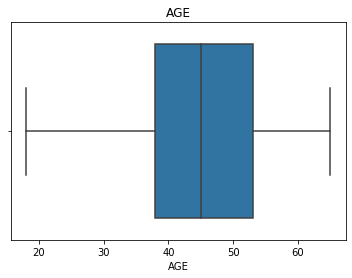

In [29]:
# boxplot
sns.boxplot(dDataFx['AGE'])
plt.title('AGE')
plt.show()

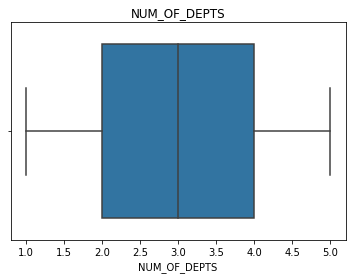

In [30]:
# boxplot
sns.boxplot(dDataFx['NUM_OF_DEPTS'])
plt.title('NUM_OF_DEPTS')
plt.show()

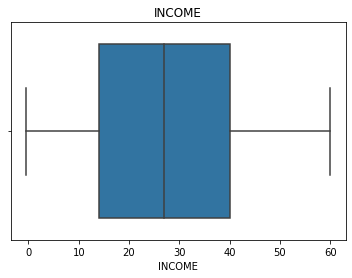

In [31]:
# boxplot
sns.boxplot(dDataFx['INCOME'])
plt.title('INCOME')
plt.show()

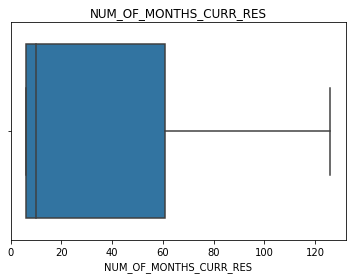

In [32]:
# boxplot
sns.boxplot(dDataFx['NUM_OF_MONTHS_CURR_RES'])
plt.title('NUM_OF_MONTHS_CURR_RES')
plt.show()

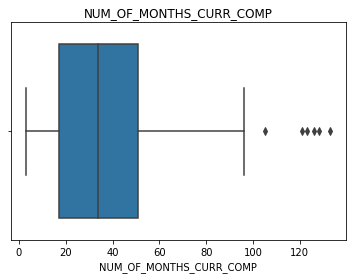

In [33]:
# boxplot
sns.boxplot(dDataFx['NUM_OF_MONTHS_CURR_COMP'])
plt.title('NUM_OF_MONTHS_CURR_COMP')
plt.show()

## Outlier Treatment/ Fixing data issues

In [34]:
#address the outlier. Identify the records which lie in either extreme and delete them
def OutlierTreat(fieldname):
    Q1 = fieldname.quantile(0.05)
    Q3 = fieldname.quantile(0.97)
    IQR = Q3 - Q1
    #print(" Q1 ->" + str(Q1) + " Q3 ->" + str(Q3))
    fieldseries = fieldname.apply(lambda x: Q1 if x < Q1 else (Q3 if x > Q3 else x) )
    
    return fieldseries

In [35]:
#Set the outlier to Quantile 1 if it is less or Quantile at 97% if it is greater. for each component
colum_out = ['NUM_OF_MONTHS_CURR_COMP'] ## Age less than 18 remove.
for col in colum_out:
    #print("Before Column ->" + str(col) + ' Values ->' + str(dDataFx[col].unique()))
    dDataFx[col] =OutlierTreat(dDataFx[col])
   # print("After Column ->" + str(col) + ' Values ->' + str(dDataFx[col].unique()))

In [36]:
dDataFx['AGE'].unique()

array([48, 31, 32, 43, 35, 42, 34, 30, 22, 37, 41, 38, 33, 45, 51, 36, 29,
       40, 20, 19, 25, 28, 50, 27, 26, 49, 47, 39, 44, 23, 46, 52, 53, 24,
       18, 21, 64, 56, 55, 60, 59, 54, 58, 62, 65, 61, 57, 63],
      dtype=int64)

### Data Analysis
### Univariate, BiVariate and Multivariate Analysis

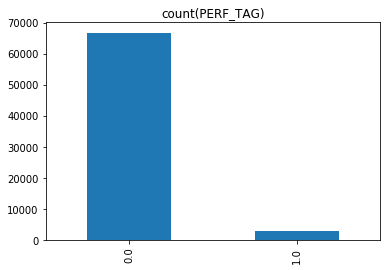

In [37]:
# Lets see the trend on Good and Bad customers in this demographics dataset. 
dDataFx['PERF_TAG'].value_counts().plot(kind = 'bar',title = 'count(PERF_TAG)')

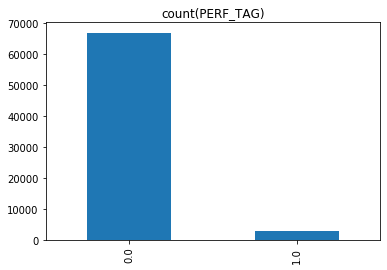

In [38]:
# Lets see the trend on Good and Bad customers in Credit Bureau dataset. 
cData['PERF_TAG'].value_counts().plot(kind = 'bar',title = 'count(PERF_TAG)')

### We can notice that we have majority of data as not default and very few defaulters. its a imbalance datasets.

### Defaulters at Overall Dataset Analysis

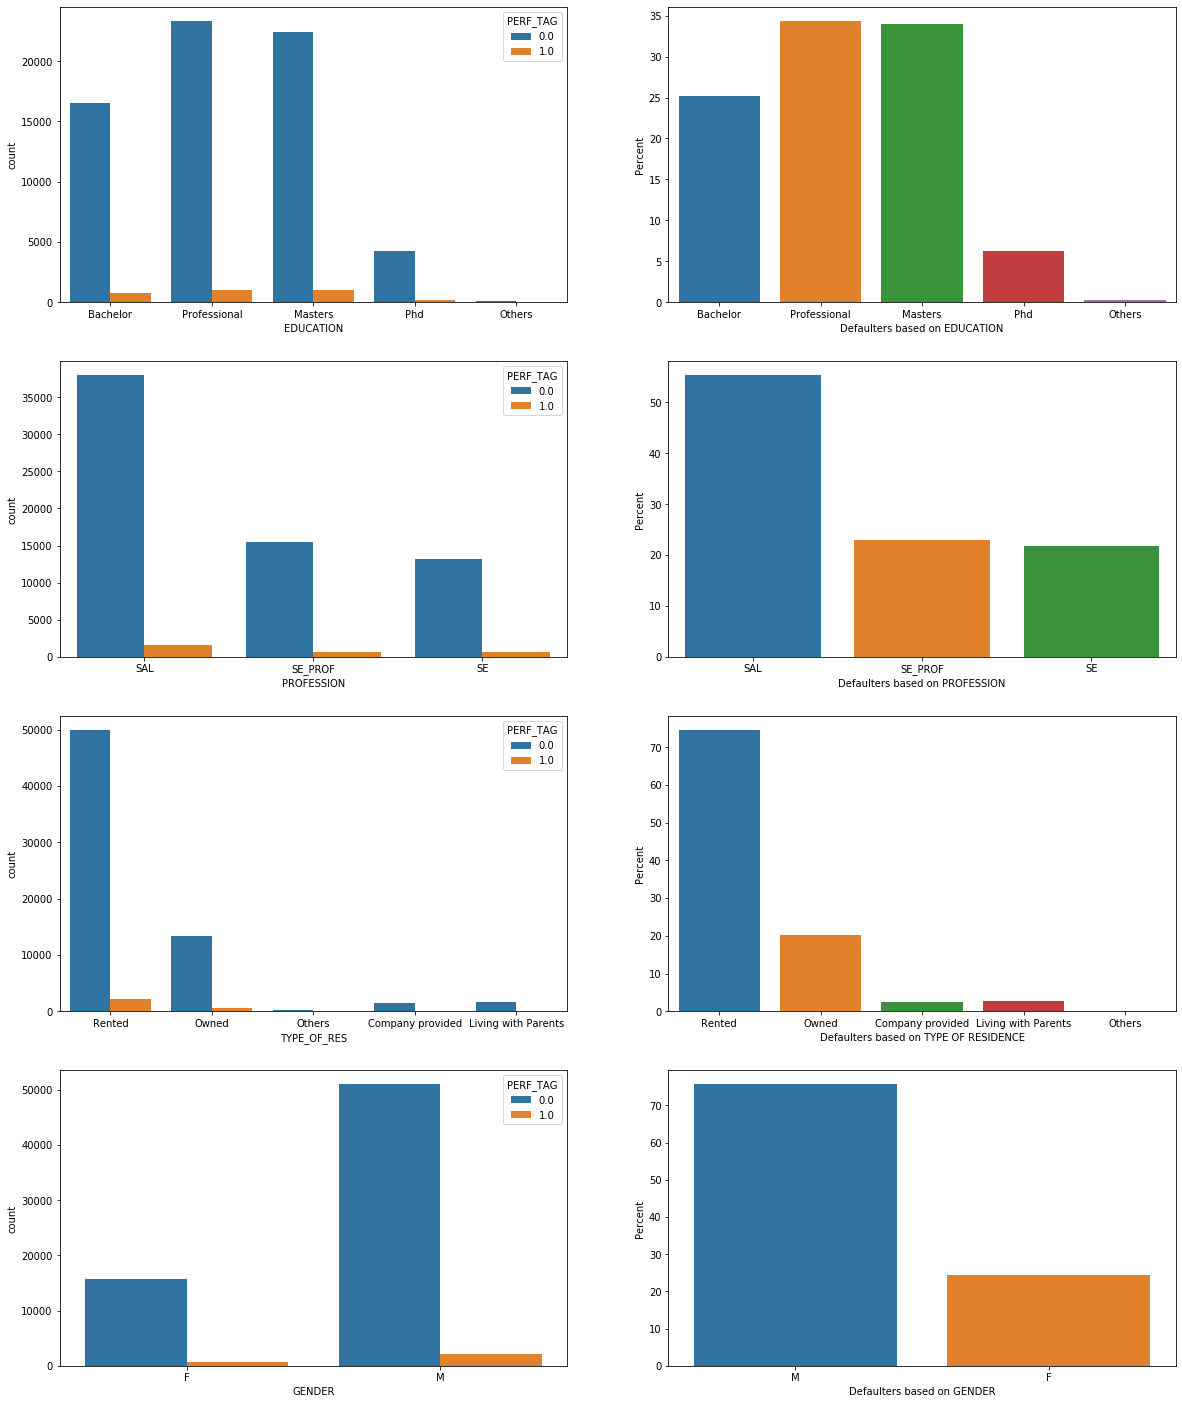

In [39]:
dDataMSFx=dDataFx[dDataFx['PERF_TAG'] == 1]

plt.figure(figsize=(20, 25))
## Top 3 
plt.subplot(4,2,1)
sns.countplot(x="EDUCATION", data=dDataFx,hue="PERF_TAG")
plt.subplot(4,2,2)
#
ax = sns.barplot(x="EDUCATION", y="PERF_TAG", data=dDataMSFx, estimator=lambda x: len(x) / len(dDataMSFx) * 100)
ax.set(ylabel="Percent")
ax.set(xlabel="Defaulters based on EDUCATION")

plt.subplot(4,2,3)
sns.countplot(x="PROFESSION", data=dDataFx,hue="PERF_TAG")
plt.subplot(4,2,4)
ax = sns.barplot(x="PROFESSION", y="PERF_TAG", data=dDataMSFx, estimator=lambda x: len(x) / len(dDataMSFx) * 100)
ax.set(ylabel="Percent")
ax.set(xlabel="Defaulters based on PROFESSION")

plt.subplot(4,2,5)
sns.countplot(x="TYPE_OF_RES", data=dDataFx,hue="PERF_TAG")
plt.subplot(4,2,6)
ax = sns.barplot(x="TYPE_OF_RES", y="PERF_TAG", data=dDataMSFx, estimator=lambda x: len(x) / len(dDataMSFx) * 100)
ax.set(ylabel="Percent")
ax.set(xlabel="Defaulters based on TYPE OF RESIDENCE")

plt.subplot(4,2,7)
sns.countplot(x="GENDER", data=dDataFx,hue="PERF_TAG")
plt.subplot(4,2,8)
ax = sns.barplot(x="GENDER", y="PERF_TAG", data=dDataMSFx, estimator=lambda x: len(x) / len(dDataMSFx) * 100)
ax.set(ylabel="Percent")
ax.set(xlabel="Defaulters based on GENDER")

plt.show()

In [40]:
def getDefaultPopulationPercent(fieldname, df):
    d0 = pd.DataFrame({'x': df[fieldname], 'y': df['PERF_TAG']})
    d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
    d.columns = [fieldname, 'Total', 'Events']
    d['Non-Events'] = d['Total'] - d['Events']    
    d['% of Default'] = (d['Events'] / (d['Events'] +d['Non-Events'])) * 100
    d['% of Non Default'] = (d['Non-Events'] / (d['Events'] +d['Non-Events'])) * 100
    return d


In [41]:
dEdu = getDefaultPopulationPercent('EDUCATION', dDataFx)
dPro=getDefaultPopulationPercent('PROFESSION', dDataFx)
dRes=getDefaultPopulationPercent('TYPE_OF_RES', dDataFx)
dGen=getDefaultPopulationPercent('GENDER', dDataFx)

### Defaulters at each subgroup level

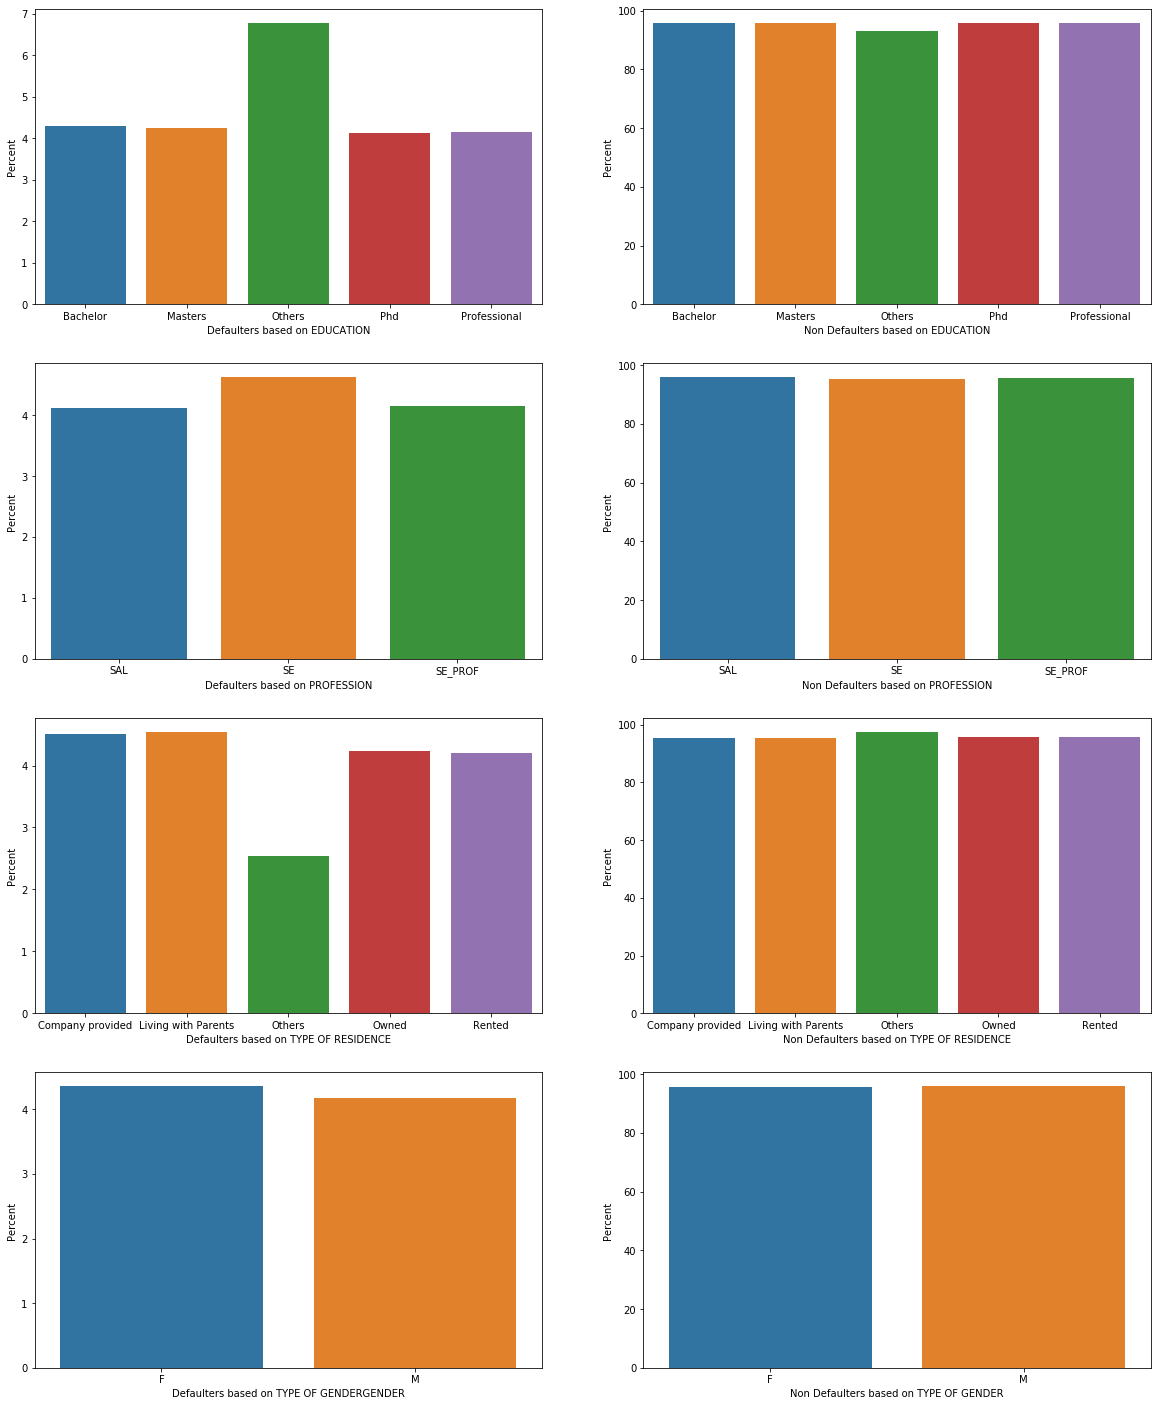

In [42]:

plt.figure(figsize=(20, 25))
## Top 3 
plt.subplot(4,2,1)
ax = sns.barplot(x="EDUCATION", y="% of Default", data=dEdu)
ax.set(ylabel="Percent")
ax.set(xlabel="Defaulters based on EDUCATION")
plt.subplot(4,2,2)
ax = sns.barplot(x="EDUCATION", y="% of Non Default", data=dEdu)
ax.set(ylabel="Percent")
ax.set(xlabel="Non Defaulters based on EDUCATION")
plt.subplot(4,2,3)
ax = sns.barplot(x="PROFESSION", y="% of Default", data=dPro)
ax.set(ylabel="Percent")
ax.set(xlabel="Defaulters based on PROFESSION")
plt.subplot(4,2,4)
ax = sns.barplot(x="PROFESSION", y="% of Non Default", data=dPro)
ax.set(ylabel="Percent")
ax.set(xlabel="Non Defaulters based on PROFESSION")
plt.subplot(4,2,5)
ax = sns.barplot(x="TYPE_OF_RES", y="% of Default", data=dRes)
ax.set(ylabel="Percent")
ax.set(xlabel="Defaulters based on TYPE OF RESIDENCE")
plt.subplot(4,2,6)
ax = sns.barplot(x="TYPE_OF_RES", y="% of Non Default", data=dRes)
ax.set(ylabel="Percent")
ax.set(xlabel="Non Defaulters based on TYPE OF RESIDENCE")
plt.subplot(4,2,7)
ax = sns.barplot(x="GENDER", y="% of Default", data=dGen)
ax.set(ylabel="Percent")
ax.set(xlabel="Defaulters based on TYPE OF GENDERGENDER")
plt.subplot(4,2,8)
ax = sns.barplot(x="GENDER", y="% of Non Default", data=dGen)
ax.set(ylabel="Percent")
ax.set(xlabel="Non Defaulters based on TYPE OF GENDER")
plt.show()

### We can notice following
1. Education - With Overall population Bachelors, Profesionals and Masters are more defaulters than PHD holders, But when we look at group population Others had higher number of defaulters.
2. PROFESSION - With Group population is the same range of 4%, overall Salarried had more defaulters since it had more records.
3. TYPE_OF_RES - Overall Rentend and Owned has more has more number of defaulters.
4. GENDER - We have more males and hence we have more number of male defaulters.

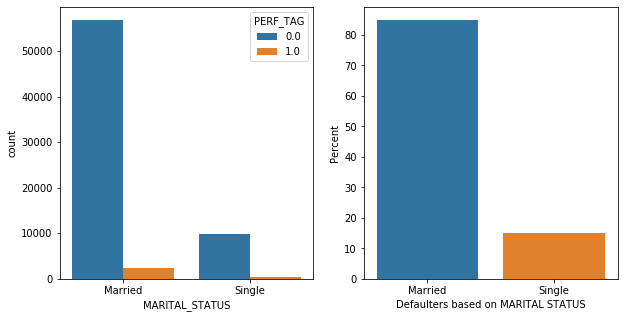

In [43]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.countplot(x="MARITAL_STATUS", data=dDataFx,hue="PERF_TAG")
plt.subplot(1,2,2)
ax = sns.barplot(x="MARITAL_STATUS", y="PERF_TAG", data=dDataMSFx, estimator=lambda x: len(x) / len(dDataMSFx) * 100)
ax.set(ylabel="Percent")
ax.set(xlabel="Defaulters based on MARITAL STATUS")
plt.show()

In [44]:
dMS = getDefaultPopulationPercent('MARITAL_STATUS', dDataFx)

[Text(0.5, 0, 'Non Defaulters based on Marital Statu1')]

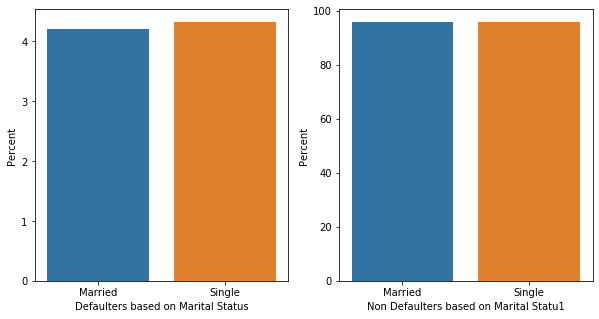

In [45]:
plt.figure(figsize=(10, 5))
## Top 3 
plt.subplot(1,2,1)
ax = sns.barplot(x="MARITAL_STATUS", y="% of Default", data=dMS)
ax.set(ylabel="Percent")
ax.set(xlabel="Defaulters based on Marital Status")
plt.subplot(1,2,2)
ax = sns.barplot(x="MARITAL_STATUS", y="% of Non Default", data=dMS)
ax.set(ylabel="Percent")
ax.set(xlabel="Non Defaulters based on Marital Statu1")

### Overall - We can find Majority of Defaulters are married. But when we look at the group based on applications received  we find Singles are getting slightly more default than Married.

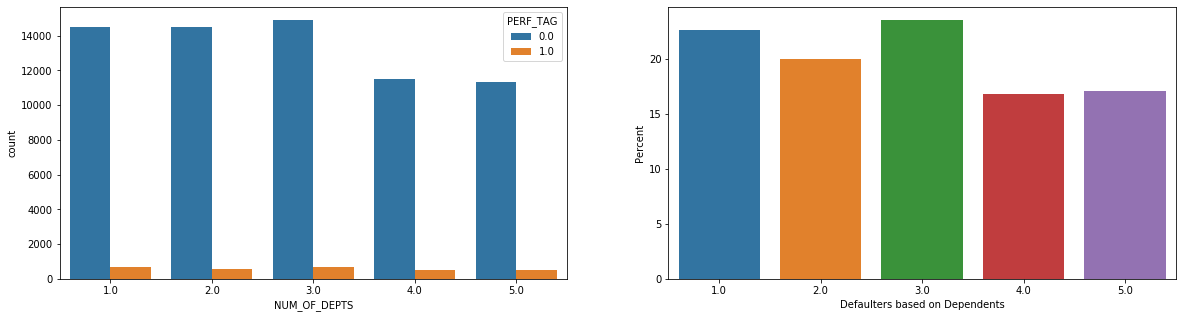

In [46]:
plt.figure(figsize=(20, 5))
## Top 3 
plt.subplot(1,2,1)
sns.countplot(x="NUM_OF_DEPTS", data=dDataFx,hue="PERF_TAG")
plt.subplot(1,2,2)
ax = sns.barplot(x="NUM_OF_DEPTS", y="PERF_TAG", data=dDataMSFx, estimator=lambda x: len(x) / len(dDataMSFx) * 100)
ax.set(ylabel="Percent")
ax.set(xlabel="Defaulters based on Dependents")
plt.show()


In [47]:
dNDep = getDefaultPopulationPercent('NUM_OF_DEPTS', dDataFx)

[Text(0.5, 0, 'Non Defaulters based on Dependents')]

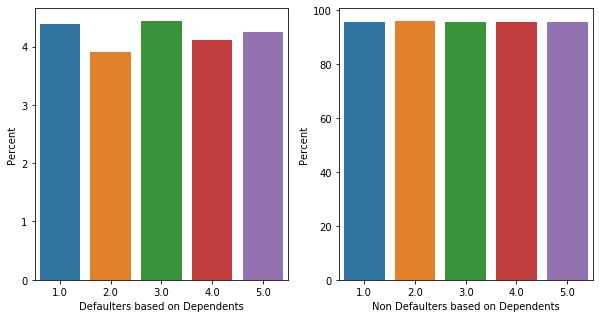

In [48]:
plt.figure(figsize=(10, 5))
## Top 3 
plt.subplot(1,2,1)
ax = sns.barplot(x="NUM_OF_DEPTS", y="% of Default", data=dNDep)
ax.set(ylabel="Percent")
ax.set(xlabel="Defaulters based on Dependents")
plt.subplot(1,2,2)
ax = sns.barplot(x="NUM_OF_DEPTS", y="% of Non Default", data=dNDep)
ax.set(ylabel="Percent")
ax.set(xlabel="Non Defaulters based on Dependents")

### Based on applications we have, we notice that dependents with 1 children and 3 have slightly high defaulters

### Lets Analyze Age varible with respect to Defaulters

In [49]:
## We are creating bins to identify which bin has more defaulters.
def find_bin(value, bins):
    for i in range(0, len(bins)):
        if bins[i][0] <= value < bins[i][1]:
            return bins[i]
    return -1

binned_weights = []
binrange = [(18,22),(22,27), (27, 32), (32, 37) , (37,42), (42,47), (47,52), (52,57), (57,62), (62,67), (67,72), (72,100)]
for value in dDataFx['AGE']:
    bin_index = find_bin(value,binrange)
    binned_weights.append(bin_index)

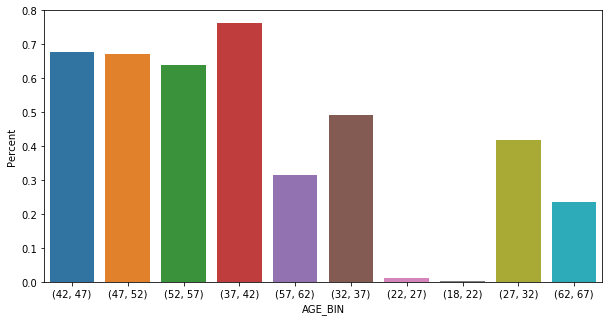

In [50]:
dAgePt = dDataFx[['AGE','PERF_TAG']]
dAgePt['AGE_BIN'] = binned_weights
dAgePtDefaulters =dAgePt[dAgePt['PERF_TAG'] == 1]
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="AGE_BIN", y="PERF_TAG", data=dAgePtDefaulters, estimator=lambda x: len(x) / len(dAgePt) * 100)
ax.set(ylabel="Percent")

plt.show()

In [51]:
dAge = getDefaultPopulationPercent('AGE_BIN', dAgePt)

[Text(0.5, 0, 'Non Defaulters based on  Age Ranges')]

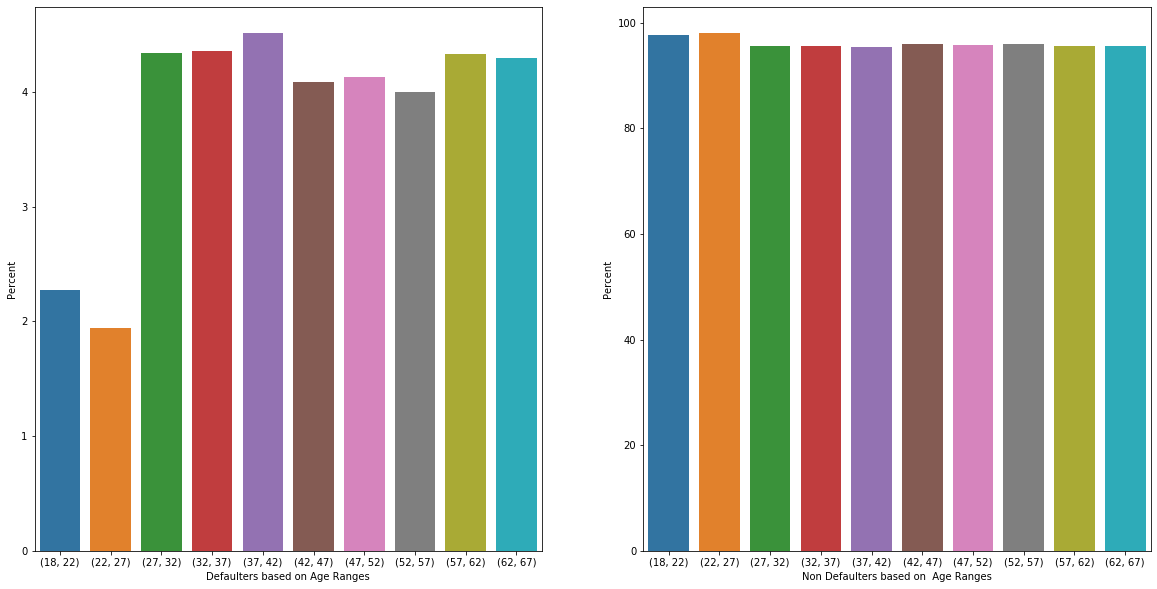

In [52]:
plt.figure(figsize=(20, 10))
## Top 3 
plt.subplot(1,2,1)
ax = sns.barplot(x="AGE_BIN", y="% of Default", data=dAge)
ax.set(ylabel="Percent")
ax.set(xlabel="Defaulters based on Age Ranges")
plt.subplot(1,2,2)
ax = sns.barplot(x="AGE_BIN", y="% of Non Default", data=dAge)
ax.set(ylabel="Percent")
ax.set(xlabel="Non Defaulters based on  Age Ranges")

### At Overall Applications We can notice that people of age group 27- 62 have defaulters. Between 37 - 42 we have nearly 17% of defaulters, When we look at group population age group between 27-67 have more defaulters.

### Bivariate Analysis

In [53]:
## Analyzing 
# pairplot
# The Pair plots are not intuitive.
# sns.pairplot(dDataFx)
#plt.show()

In [54]:
# You can also observe the correlation between the currencies 
# using df.corr()
cor = dDataFx.corr()
round(cor, 3)

,AID,AGE,NUM_OF_DEPTS,INCOME,NUM_OF_MONTHS_CURR_RES,NUM_OF_MONTHS_CURR_COMP,PERF_TAG
AID,1.000,0.000,-0.006,0.001,0.000,-0.003,0.001
AGE,0.000,1.000,0.165,0.059,-0.065,-0.024,-0.002
NUM_OF_DEPTS,-0.006,0.165,1.000,0.027,-0.005,-0.006,-0.001
INCOME,0.001,0.059,0.027,1.000,-0.093,-0.098,-0.039
NUM_OF_MONTHS_CURR_RES,0.000,-0.065,-0.005,-0.093,1.000,-0.075,0.016
NUM_OF_MONTHS_CURR_COMP,-0.003,-0.024,-0.006,-0.098,-0.075,1.000,-0.019
PERF_TAG,0.001,-0.002,-0.001,-0.039,0.016,-0.019,1.000


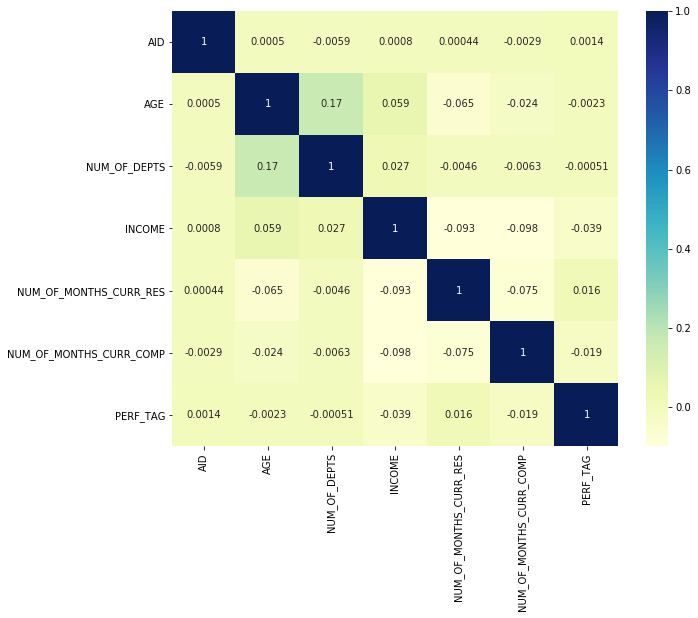

In [55]:
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

#### No Correlation Found in Demographics Data.

## 2. Credit Bureau Data

## Fixing Data Issues.

In [56]:
# Fixing Credit Bureau data issues.
# looping to see null percentage is greater than 0% which indicates the columns to be dropped.
cDataFx = cData
dropcolumns = {}
for col in cData.columns:
    if (cData[col].isnull().sum()*100/cData.shape[0]) > 0:
        dropcolumns[col] = round(cData[col].isnull().sum()*100/cData.shape[0],2)
print(dropcolumns)

{'AVG_CC_UTIL_INLAS12M': 1.46, 'NUM_TRAD_LAS6M': 0.0, 'PRSNC_OPN_HOME_LOAN': 0.39, 'OUT_BAL': 0.39}


In [57]:
### Dropping rows which has NAN values.
print("Before - "+ str(cDataFx.shape) + " And Performance Flag details  ->" + str(cDataFx['PERF_TAG'].value_counts()))
cDataFx = cDataFx.dropna()
print("After - " + str(cDataFx.shape) + " And Performance Flag details  ->" + str(cDataFx['PERF_TAG'].value_counts()))

Before - (69870, 19) And Performance Flag details  ->0.0    66922
1.0     2948
Name: PERF_TAG, dtype: int64
After - (68847, 19) And Performance Flag details  ->0.0    65947
1.0     2900
Name: PERF_TAG, dtype: int64


### Since the impact of dropping NA is minimal we can drop rows. The major distribution of Performance Tag is not impacted.

In [58]:
#create a list of numeric cols(int and float)
NumCols = cDataFx.select_dtypes(include=[np.float64, np.int64])

#find the outliers
lstOutlier =[]
for fieldname in NumCols:
    OutlierDet(fieldname, NumCols)
print(lstOutlier)

['NUM_90DPD_INLAS6M', 'NUM_60DPD_INLAS6M', 'NUM_30DPD_INLAS6M', 'NUM_90DPD_INLAS12M', 'NUM_60DPD_INLAS12M', 'NUM_30DPD_INLAS12M', 'NUM_TRAD_LAS6M', 'NUM_TRAD_LAS12M', 'NUM_PL_TRAD_LAS6M', 'NUM_PL_TRAD_LAS12M', 'NUM_OF_INQ_LAS6M', 'NUM_OF_INQ_LAS12M', 'OUT_BAL', 'TOT_NUM_TRD', 'PRSNC_OPN_AUTO_LOAN', 'PERF_TAG']


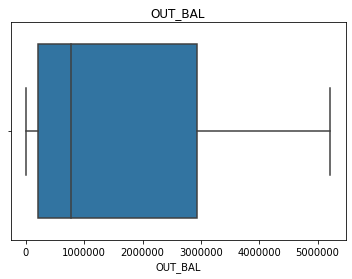

In [59]:
# boxplot
sns.boxplot(cDataFx['OUT_BAL'])
plt.title('OUT_BAL')
plt.show()

### Data Analysis
### Univariate, BiVariate and Multivariate Analysis

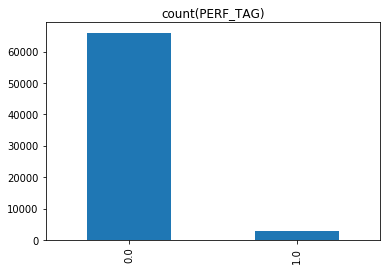

In [60]:
# Lets see the trend on Good and Bad customers in this demographics dataset. 
cDataFx['PERF_TAG'].value_counts().plot(kind = 'bar',title = 'count(PERF_TAG)')

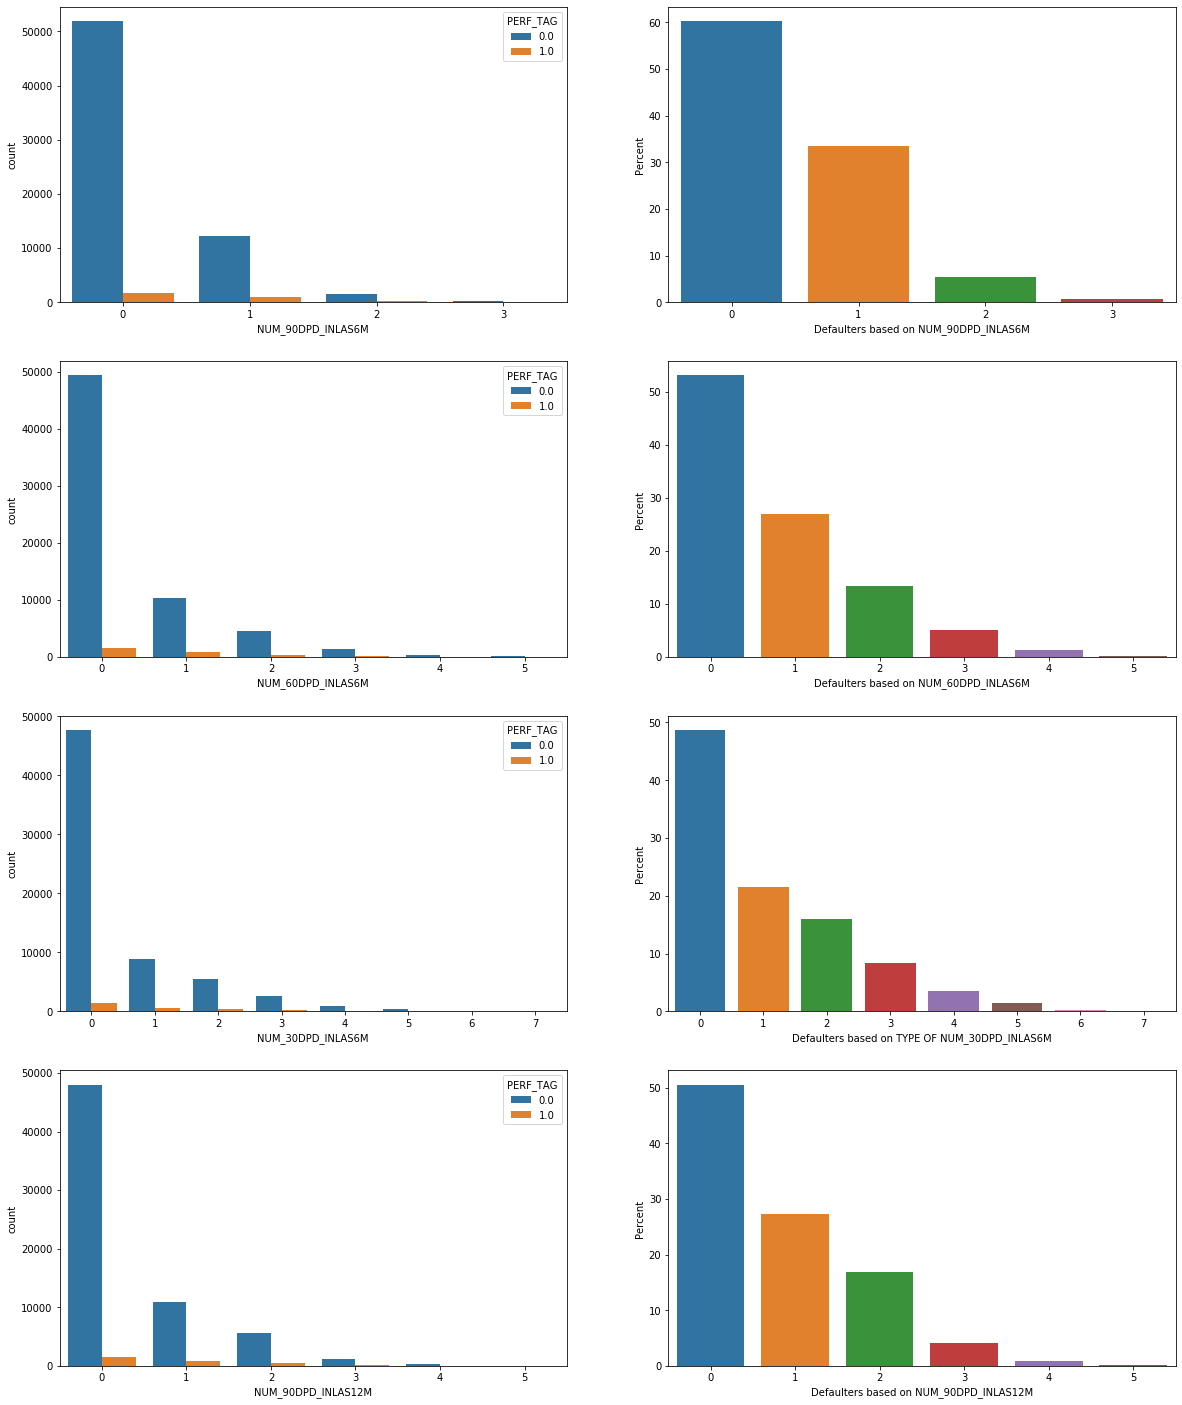

In [61]:
cDataMSFx=cDataFx[cDataFx['PERF_TAG'] == 1]

plt.figure(figsize=(20, 25))
## Top 3 
plt.subplot(4,2,1)
sns.countplot(x="NUM_90DPD_INLAS6M", data=cDataFx,hue="PERF_TAG")
plt.subplot(4,2,2)
#
ax = sns.barplot(x="NUM_90DPD_INLAS6M", y="PERF_TAG", data=cDataMSFx, estimator=lambda x: len(x) / len(cDataMSFx) * 100)
ax.set(ylabel="Percent")
ax.set(xlabel="Defaulters based on NUM_90DPD_INLAS6M")

plt.subplot(4,2,3)
sns.countplot(x="NUM_60DPD_INLAS6M", data=cDataFx,hue="PERF_TAG")
plt.subplot(4,2,4)
ax = sns.barplot(x="NUM_60DPD_INLAS6M", y="PERF_TAG", data=cDataMSFx, estimator=lambda x: len(x) / len(cDataMSFx) * 100)
ax.set(ylabel="Percent")
ax.set(xlabel="Defaulters based on NUM_60DPD_INLAS6M")

plt.subplot(4,2,5)
sns.countplot(x="NUM_30DPD_INLAS6M", data=cDataFx,hue="PERF_TAG")
plt.subplot(4,2,6)
ax = sns.barplot(x="NUM_30DPD_INLAS6M", y="PERF_TAG", data=cDataMSFx, estimator=lambda x: len(x) / len(cDataMSFx) * 100)
ax.set(ylabel="Percent")
ax.set(xlabel="Defaulters based on TYPE OF NUM_30DPD_INLAS6M")

plt.subplot(4,2,7)
sns.countplot(x="NUM_90DPD_INLAS12M", data=cDataFx,hue="PERF_TAG")
plt.subplot(4,2,8)
ax = sns.barplot(x="NUM_90DPD_INLAS12M", y="PERF_TAG", data=cDataMSFx, estimator=lambda x: len(x) / len(cDataMSFx) * 100)
ax.set(ylabel="Percent")
ax.set(xlabel="Defaulters based on NUM_90DPD_INLAS12M")

plt.show()

### We can notice that people who did not miss due date or missed once due date are usually getting default, this is an indication.

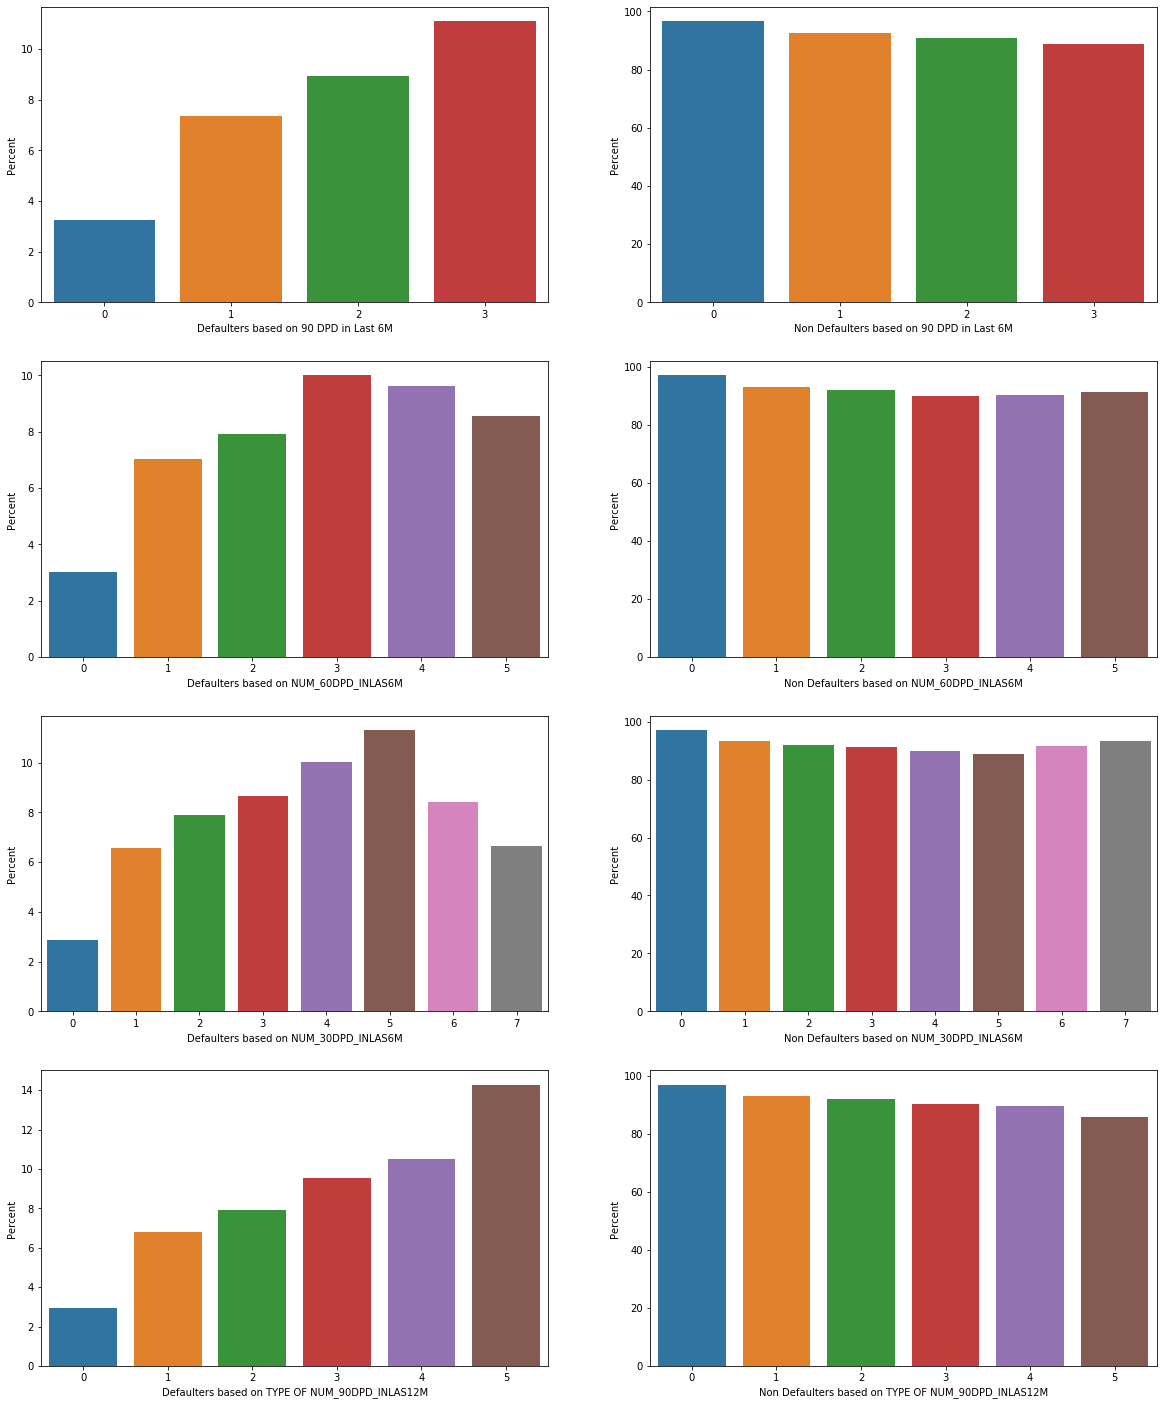

In [62]:
d90Dpd6MDep = getDefaultPopulationPercent('NUM_90DPD_INLAS6M', cDataFx)
d60Dpd6MDep = getDefaultPopulationPercent('NUM_60DPD_INLAS6M', cDataFx)
d30Dpd6MDep = getDefaultPopulationPercent('NUM_30DPD_INLAS6M', cDataFx)
d90Dpd12MDep = getDefaultPopulationPercent('NUM_90DPD_INLAS12M', cDataFx)

plt.figure(figsize=(20, 25))
## Top 3 
plt.subplot(4,2,1)
ax = sns.barplot(x="NUM_90DPD_INLAS6M", y="% of Default", data=d90Dpd6MDep)
ax.set(ylabel="Percent")
ax.set(xlabel="Defaulters based on 90 DPD in Last 6M")
plt.subplot(4,2,2)
ax = sns.barplot(x="NUM_90DPD_INLAS6M", y="% of Non Default", data=d90Dpd6MDep)
ax.set(ylabel="Percent")
ax.set(xlabel="Non Defaulters based on 90 DPD in Last 6M")
plt.subplot(4,2,3)
ax = sns.barplot(x="NUM_60DPD_INLAS6M", y="% of Default", data=d60Dpd6MDep)
ax.set(ylabel="Percent")
ax.set(xlabel="Defaulters based on NUM_60DPD_INLAS6M")
plt.subplot(4,2,4)
ax = sns.barplot(x="NUM_60DPD_INLAS6M", y="% of Non Default", data=d60Dpd6MDep)
ax.set(ylabel="Percent")
ax.set(xlabel="Non Defaulters based on NUM_60DPD_INLAS6M")
plt.subplot(4,2,5)
ax = sns.barplot(x="NUM_30DPD_INLAS6M", y="% of Default", data=d30Dpd6MDep)
ax.set(ylabel="Percent")
ax.set(xlabel="Defaulters based on NUM_30DPD_INLAS6M")
plt.subplot(4,2,6)
ax = sns.barplot(x="NUM_30DPD_INLAS6M", y="% of Non Default", data=d30Dpd6MDep)
ax.set(ylabel="Percent")
ax.set(xlabel="Non Defaulters based on NUM_30DPD_INLAS6M")
plt.subplot(4,2,7)
ax = sns.barplot(x="NUM_90DPD_INLAS12M", y="% of Default", data=d90Dpd12MDep)
ax.set(ylabel="Percent")
ax.set(xlabel="Defaulters based on TYPE OF NUM_90DPD_INLAS12M")
plt.subplot(4,2,8)
ax = sns.barplot(x="NUM_90DPD_INLAS12M", y="% of Non Default", data=d90Dpd12MDep)
ax.set(ylabel="Percent")
ax.set(xlabel="Non Defaulters based on TYPE OF NUM_90DPD_INLAS12M")
plt.show()

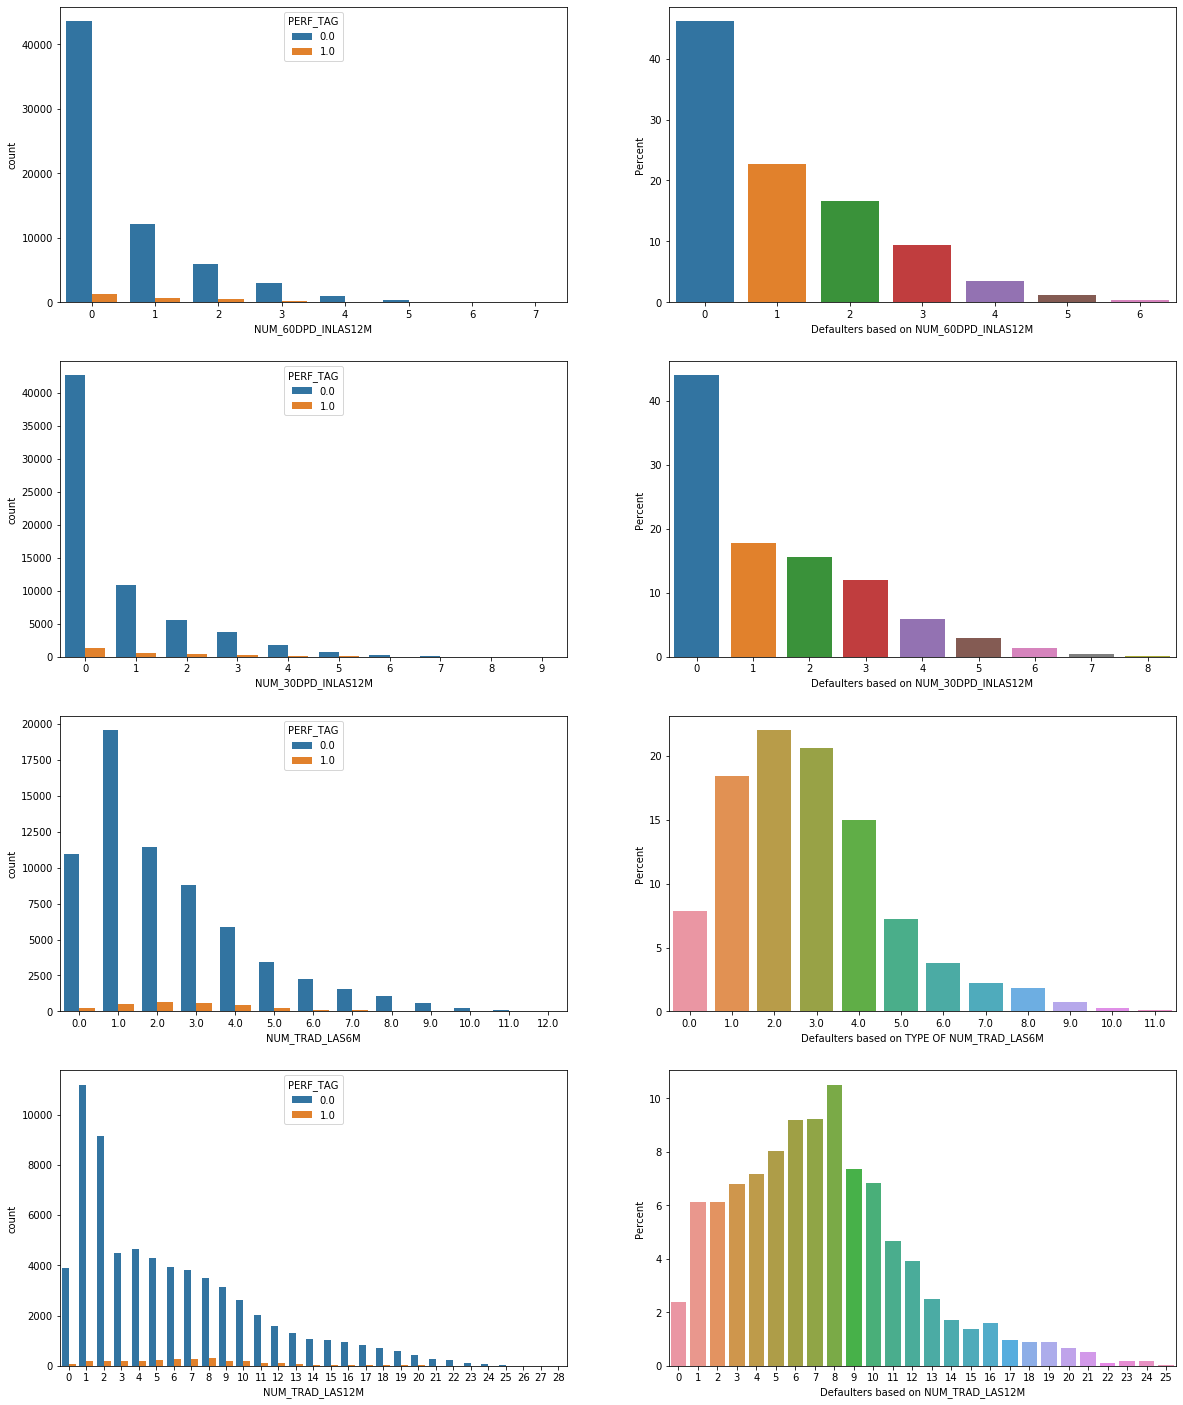

In [63]:
plt.figure(figsize=(20, 25))
## Top 3 
plt.subplot(4,2,1)
sns.countplot(x="NUM_60DPD_INLAS12M", data=cDataFx,hue="PERF_TAG")
plt.subplot(4,2,2)
#
ax = sns.barplot(x="NUM_60DPD_INLAS12M", y="PERF_TAG", data=cDataMSFx, estimator=lambda x: len(x) / len(cDataMSFx) * 100)
ax.set(ylabel="Percent")
ax.set(xlabel="Defaulters based on NUM_60DPD_INLAS12M")

plt.subplot(4,2,3)
sns.countplot(x="NUM_30DPD_INLAS12M", data=cDataFx,hue="PERF_TAG")
plt.subplot(4,2,4)
ax = sns.barplot(x="NUM_30DPD_INLAS12M", y="PERF_TAG", data=cDataMSFx, estimator=lambda x: len(x) / len(cDataMSFx) * 100)
ax.set(ylabel="Percent")
ax.set(xlabel="Defaulters based on NUM_30DPD_INLAS12M")

plt.subplot(4,2,5)
sns.countplot(x="NUM_TRAD_LAS6M", data=cDataFx,hue="PERF_TAG")
plt.subplot(4,2,6)
ax = sns.barplot(x="NUM_TRAD_LAS6M", y="PERF_TAG", data=cDataMSFx, estimator=lambda x: len(x) / len(cDataMSFx) * 100)
ax.set(ylabel="Percent")
ax.set(xlabel="Defaulters based on TYPE OF NUM_TRAD_LAS6M")

plt.subplot(4,2,7)
sns.countplot(x="NUM_TRAD_LAS12M", data=cDataFx,hue="PERF_TAG")
plt.subplot(4,2,8)
ax = sns.barplot(x="NUM_TRAD_LAS12M", y="PERF_TAG", data=cDataMSFx, estimator=lambda x: len(x) / len(cDataMSFx) * 100)
ax.set(ylabel="Percent")
ax.set(xlabel="Defaulters based on NUM_TRAD_LAS12M")

plt.show()

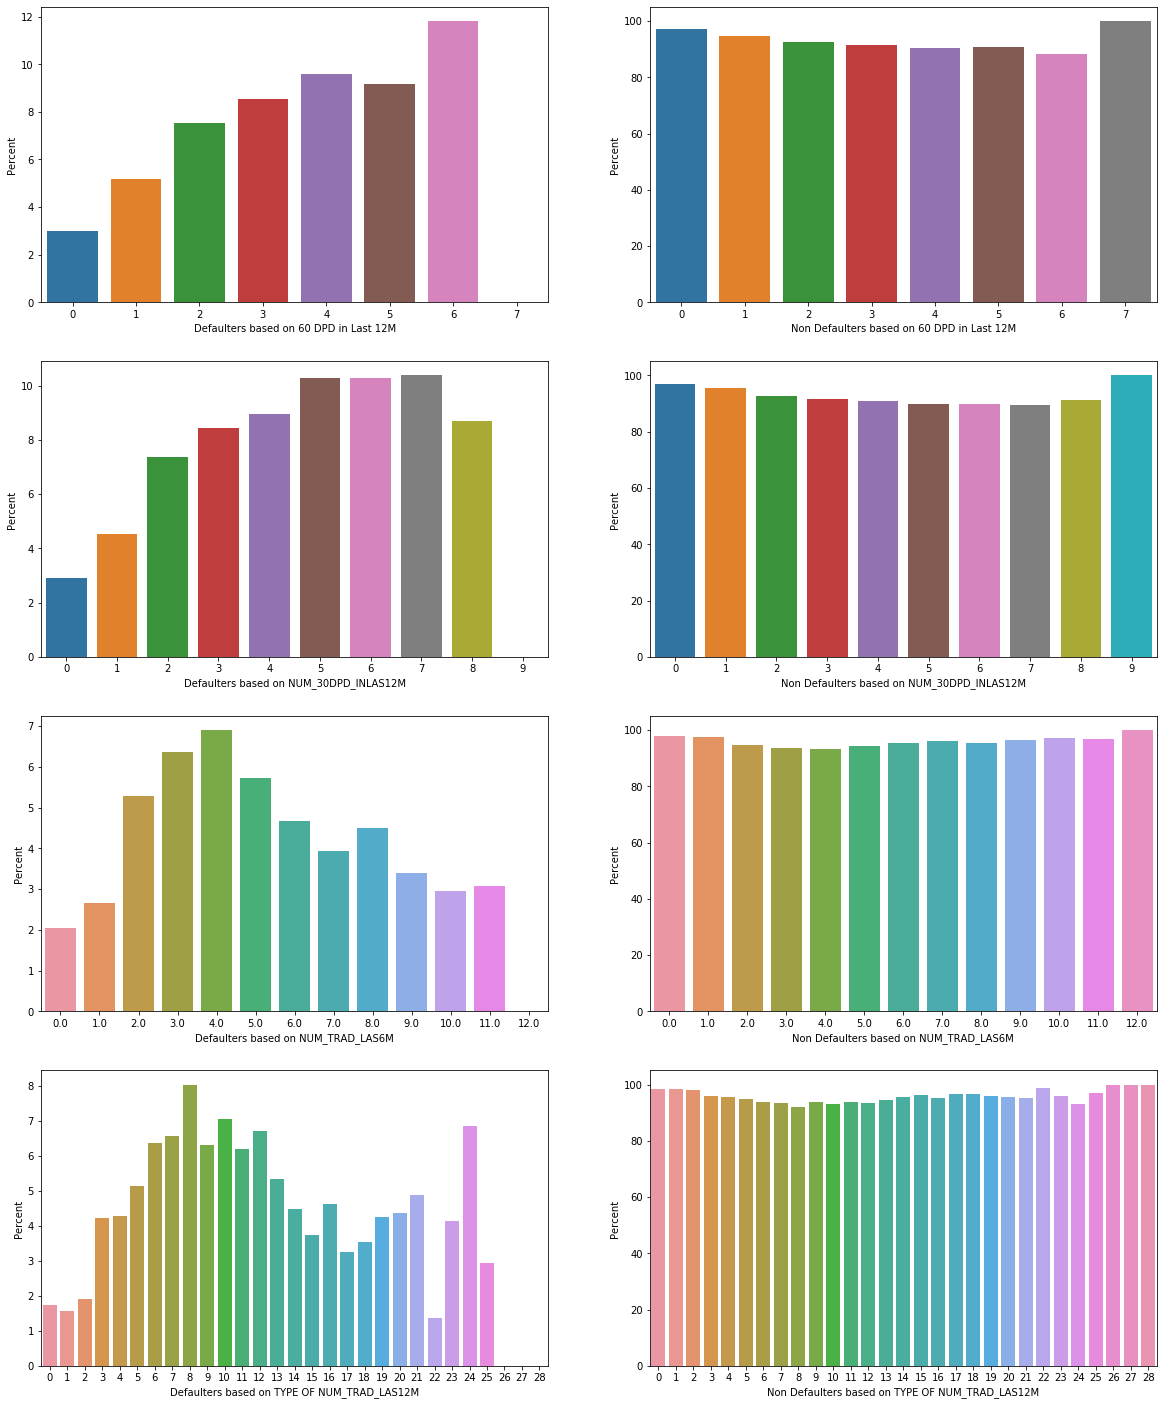

In [64]:
d60Dpd12MDep = getDefaultPopulationPercent('NUM_60DPD_INLAS12M', cDataFx)
d30Dpd12MDep = getDefaultPopulationPercent('NUM_30DPD_INLAS12M', cDataFx)
dNTRD6M = getDefaultPopulationPercent('NUM_TRAD_LAS6M', cDataFx)
dNTRD12M = getDefaultPopulationPercent('NUM_TRAD_LAS12M', cDataFx)

plt.figure(figsize=(20, 25))
## Top 3 
plt.subplot(4,2,1)
ax = sns.barplot(x="NUM_60DPD_INLAS12M", y="% of Default", data=d60Dpd12MDep)
ax.set(ylabel="Percent")
ax.set(xlabel="Defaulters based on 60 DPD in Last 12M")
plt.subplot(4,2,2)
ax = sns.barplot(x="NUM_60DPD_INLAS12M", y="% of Non Default", data=d60Dpd12MDep)
ax.set(ylabel="Percent")
ax.set(xlabel="Non Defaulters based on 60 DPD in Last 12M")
plt.subplot(4,2,3)
ax = sns.barplot(x="NUM_30DPD_INLAS12M", y="% of Default", data=d30Dpd12MDep)
ax.set(ylabel="Percent")
ax.set(xlabel="Defaulters based on NUM_30DPD_INLAS12M")
plt.subplot(4,2,4)
ax = sns.barplot(x="NUM_30DPD_INLAS12M", y="% of Non Default", data=d30Dpd12MDep)
ax.set(ylabel="Percent")
ax.set(xlabel="Non Defaulters based on NUM_30DPD_INLAS12M")
plt.subplot(4,2,5)
ax = sns.barplot(x="NUM_TRAD_LAS6M", y="% of Default", data=dNTRD6M)
ax.set(ylabel="Percent")
ax.set(xlabel="Defaulters based on NUM_TRAD_LAS6M")
plt.subplot(4,2,6)
ax = sns.barplot(x="NUM_TRAD_LAS6M", y="% of Non Default", data=dNTRD6M)
ax.set(ylabel="Percent")
ax.set(xlabel="Non Defaulters based on NUM_TRAD_LAS6M")
plt.subplot(4,2,7)
ax = sns.barplot(x="NUM_TRAD_LAS12M", y="% of Default", data=dNTRD12M)
ax.set(ylabel="Percent")
ax.set(xlabel="Defaulters based on TYPE OF NUM_TRAD_LAS12M")
plt.subplot(4,2,8)
ax = sns.barplot(x="NUM_TRAD_LAS12M", y="% of Non Default", data=dNTRD12M)
ax.set(ylabel="Percent")
ax.set(xlabel="Non Defaulters based on TYPE OF NUM_TRAD_LAS12M")
plt.show()

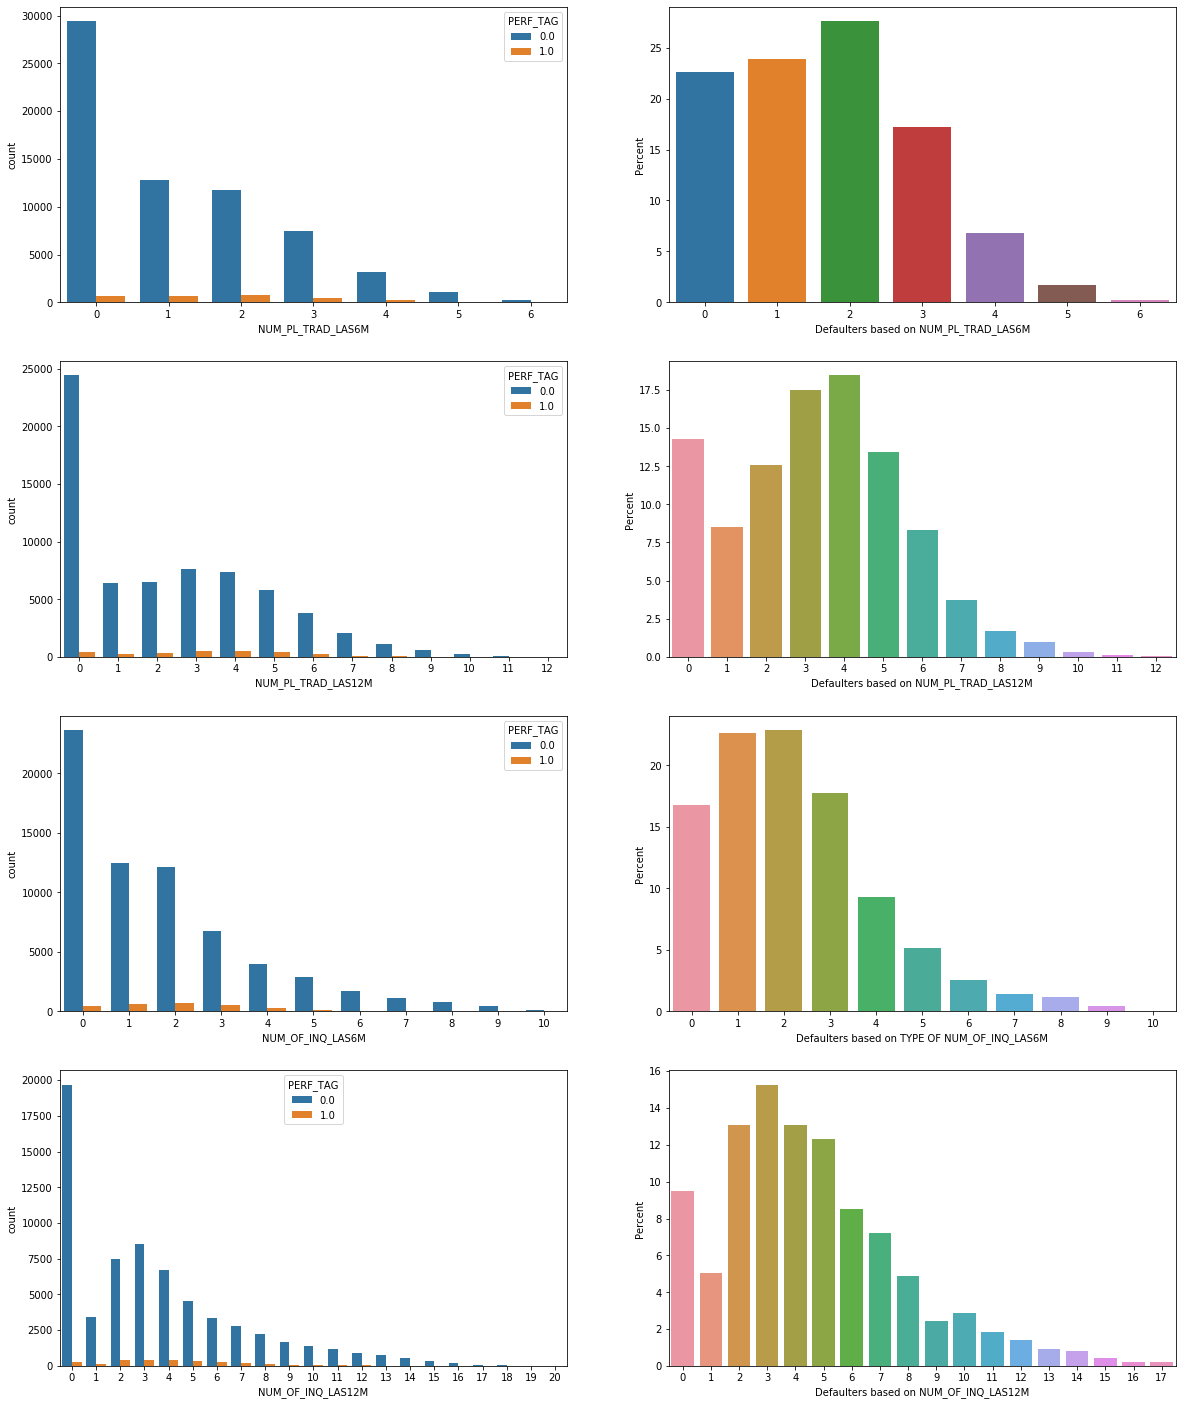

In [65]:
plt.figure(figsize=(20, 25))
## Top 3 
plt.subplot(4,2,1)
sns.countplot(x="NUM_PL_TRAD_LAS6M", data=cDataFx,hue="PERF_TAG")
plt.subplot(4,2,2)
#
ax = sns.barplot(x="NUM_PL_TRAD_LAS6M", y="PERF_TAG", data=cDataMSFx, estimator=lambda x: len(x) / len(cDataMSFx) * 100)
ax.set(ylabel="Percent")
ax.set(xlabel="Defaulters based on NUM_PL_TRAD_LAS6M")

plt.subplot(4,2,3)
sns.countplot(x="NUM_PL_TRAD_LAS12M", data=cDataFx,hue="PERF_TAG")
plt.subplot(4,2,4)
ax = sns.barplot(x="NUM_PL_TRAD_LAS12M", y="PERF_TAG", data=cDataMSFx, estimator=lambda x: len(x) / len(cDataMSFx) * 100)
ax.set(ylabel="Percent")
ax.set(xlabel="Defaulters based on NUM_PL_TRAD_LAS12M")

plt.subplot(4,2,5)
sns.countplot(x="NUM_OF_INQ_LAS6M", data=cDataFx,hue="PERF_TAG")
plt.subplot(4,2,6)
ax = sns.barplot(x="NUM_OF_INQ_LAS6M", y="PERF_TAG", data=cDataMSFx, estimator=lambda x: len(x) / len(cDataMSFx) * 100)
ax.set(ylabel="Percent")
ax.set(xlabel="Defaulters based on TYPE OF NUM_OF_INQ_LAS6M")

plt.subplot(4,2,7)
sns.countplot(x="NUM_OF_INQ_LAS12M", data=cDataFx,hue="PERF_TAG")
plt.subplot(4,2,8)
ax = sns.barplot(x="NUM_OF_INQ_LAS12M", y="PERF_TAG", data=cDataMSFx, estimator=lambda x: len(x) / len(cDataMSFx) * 100)
ax.set(ylabel="Percent")
ax.set(xlabel="Defaulters based on NUM_OF_INQ_LAS12M")

plt.show()

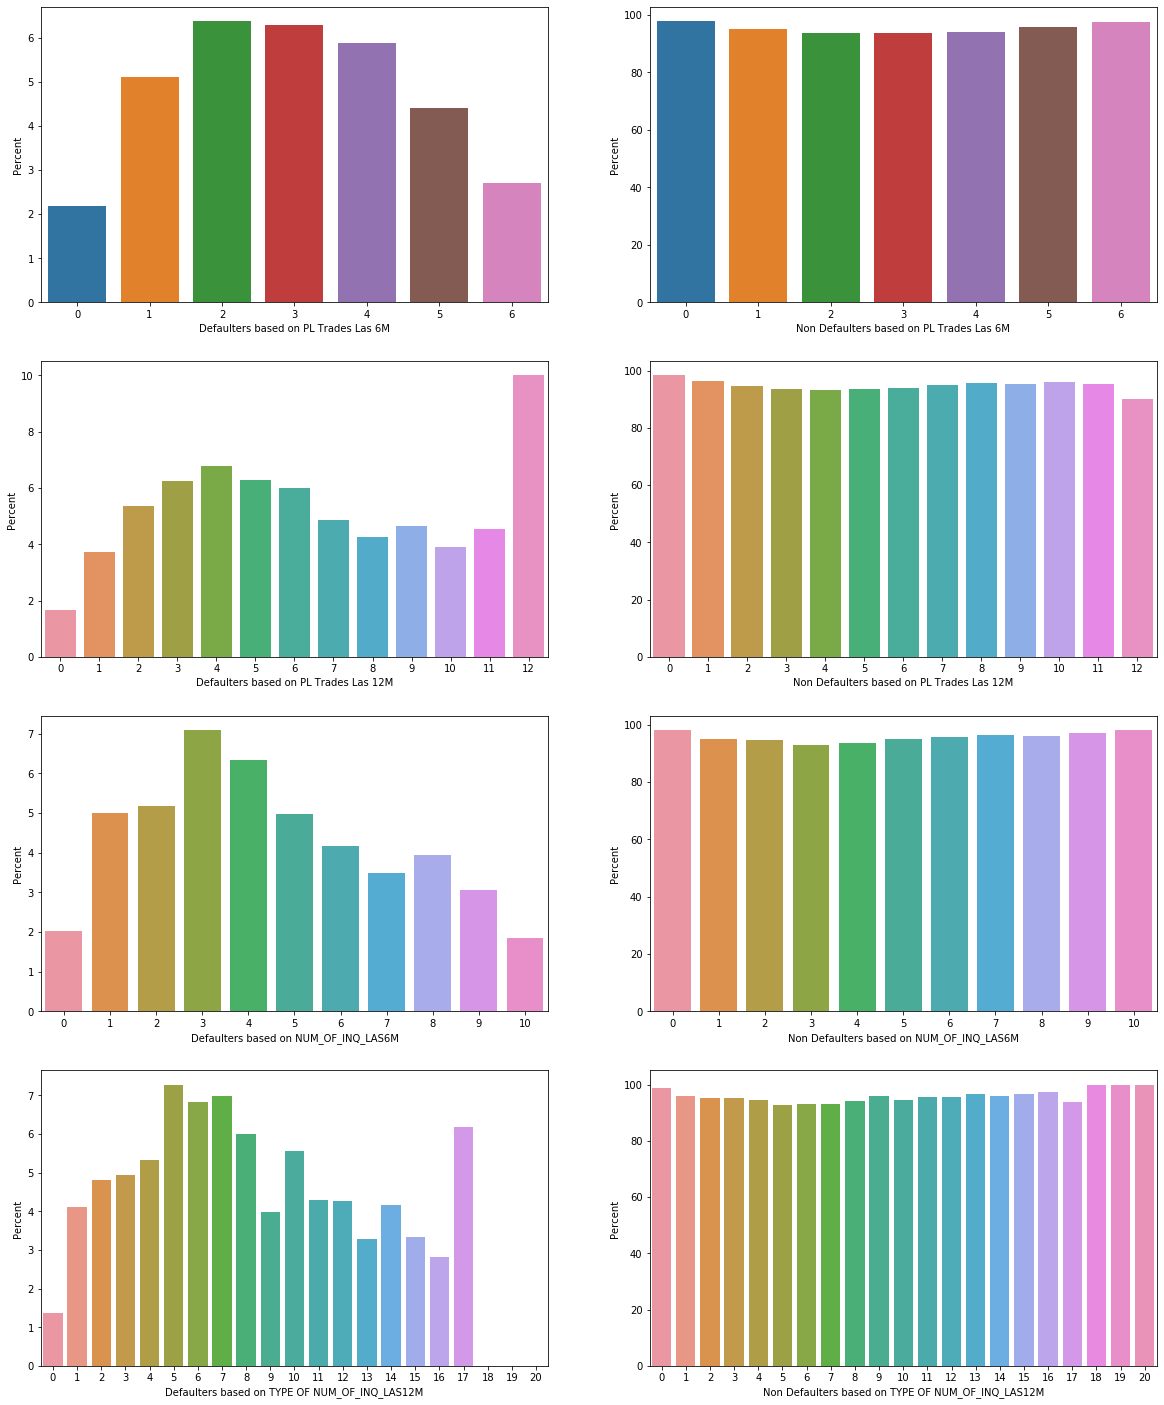

In [66]:
dNPlTrd6M = getDefaultPopulationPercent('NUM_PL_TRAD_LAS6M', cDataFx)
dNPlTrd12M = getDefaultPopulationPercent('NUM_PL_TRAD_LAS12M', cDataFx)
dNInq6M = getDefaultPopulationPercent('NUM_OF_INQ_LAS6M', cDataFx)
dNInq12M = getDefaultPopulationPercent('NUM_OF_INQ_LAS12M', cDataFx)

plt.figure(figsize=(20, 25))
## Top 3 
plt.subplot(4,2,1)
ax = sns.barplot(x="NUM_PL_TRAD_LAS6M", y="% of Default", data=dNPlTrd6M)
ax.set(ylabel="Percent")
ax.set(xlabel="Defaulters based on PL Trades Las 6M")
plt.subplot(4,2,2)
ax = sns.barplot(x="NUM_PL_TRAD_LAS6M", y="% of Non Default", data=dNPlTrd6M)
ax.set(ylabel="Percent")
ax.set(xlabel="Non Defaulters based on PL Trades Las 6M")
plt.subplot(4,2,3)
ax = sns.barplot(x="NUM_PL_TRAD_LAS12M", y="% of Default", data=dNPlTrd12M)
ax.set(ylabel="Percent")
ax.set(xlabel="Defaulters based on PL Trades Las 12M")
plt.subplot(4,2,4)
ax = sns.barplot(x="NUM_PL_TRAD_LAS12M", y="% of Non Default", data=dNPlTrd12M)
ax.set(ylabel="Percent")
ax.set(xlabel="Non Defaulters based on PL Trades Las 12M")
plt.subplot(4,2,5)
ax = sns.barplot(x="NUM_OF_INQ_LAS6M", y="% of Default", data=dNInq6M)
ax.set(ylabel="Percent")
ax.set(xlabel="Defaulters based on NUM_OF_INQ_LAS6M")
plt.subplot(4,2,6)
ax = sns.barplot(x="NUM_OF_INQ_LAS6M", y="% of Non Default", data=dNInq6M)
ax.set(ylabel="Percent")
ax.set(xlabel="Non Defaulters based on NUM_OF_INQ_LAS6M")
plt.subplot(4,2,7)
ax = sns.barplot(x="NUM_OF_INQ_LAS12M", y="% of Default", data=dNInq12M)
ax.set(ylabel="Percent")
ax.set(xlabel="Defaulters based on TYPE OF NUM_OF_INQ_LAS12M")
plt.subplot(4,2,8)
ax = sns.barplot(x="NUM_OF_INQ_LAS12M", y="% of Non Default", data=dNInq12M)
ax.set(ylabel="Percent")
ax.set(xlabel="Non Defaulters based on TYPE OF NUM_OF_INQ_LAS12M")
plt.show()

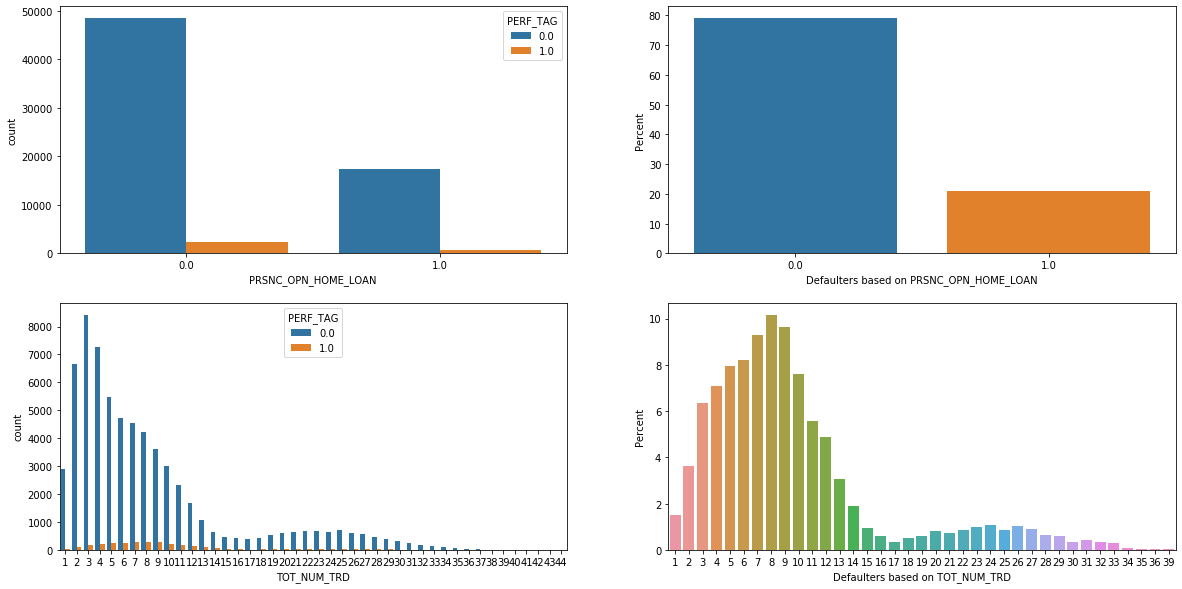

In [67]:
plt.figure(figsize=(20, 10))
## Top 3 
plt.subplot(2,2,1)
sns.countplot(x="PRSNC_OPN_HOME_LOAN", data=cDataFx,hue="PERF_TAG")
plt.subplot(2,2,2)
#
ax = sns.barplot(x="PRSNC_OPN_HOME_LOAN", y="PERF_TAG", data=cDataMSFx, estimator=lambda x: len(x) / len(cDataMSFx) * 100)
ax.set(ylabel="Percent")
ax.set(xlabel="Defaulters based on PRSNC_OPN_HOME_LOAN")

plt.subplot(2,2,3)
sns.countplot(x="TOT_NUM_TRD", data=cDataFx,hue="PERF_TAG")
plt.subplot(2,2,4)
ax = sns.barplot(x="TOT_NUM_TRD", y="PERF_TAG", data=cDataMSFx, estimator=lambda x: len(x) / len(cDataMSFx) * 100)
ax.set(ylabel="Percent")
ax.set(xlabel="Defaulters based on TOT_NUM_TRD")
plt.show()

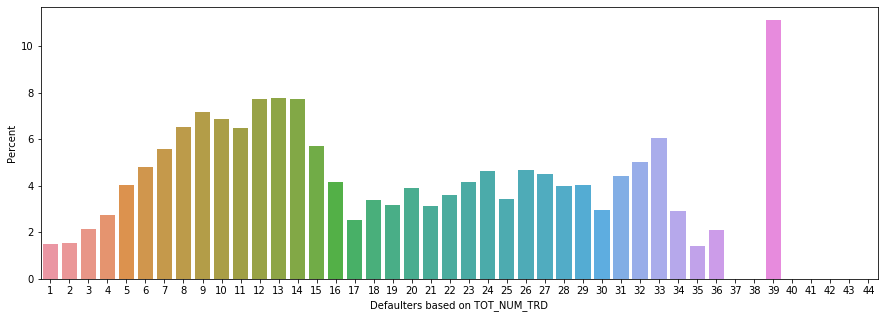

In [68]:
dTotNTrd = getDefaultPopulationPercent('TOT_NUM_TRD', cDataFx)
plt.figure(figsize=(15, 5))
## Top 3 
#plt.subplot(1,2,1)
ax = sns.barplot(x="TOT_NUM_TRD", y="% of Default", data=dTotNTrd)
ax.set(ylabel="Percent")
ax.set(xlabel="Defaulters based on TOT_NUM_TRD")
#plt.subplot(1,2,2)
#ax = sns.barplot(x="TOT_NUM_TRD", y="% of Non Default", data=dTotNTrd)
#ax.set(ylabel="Percent")
#ax.set(xlabel="Non Defaulters based on TOT_NUM_TRD")
plt.show()

### Bivariate Analysis

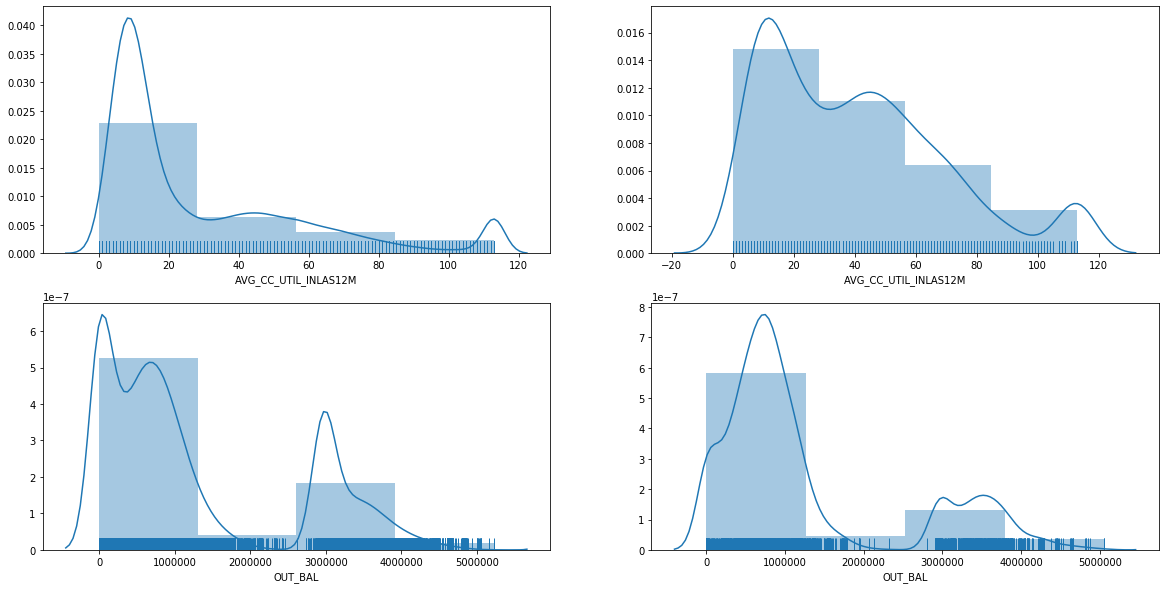

In [69]:
### Ploting Defaulters and Non Defaulters graph
### Bivariate Analysis on Defaultes and non defaulters based on Credit card utilization.
plt.figure(figsize=(20, 10))
## Top 3 
plt.subplot(2,2,1)
sns.distplot(cDataFx['AVG_CC_UTIL_INLAS12M'],bins=4,rug=True)
plt.subplot(2,2,2)
#
sns.distplot(cDataMSFx['AVG_CC_UTIL_INLAS12M'],bins=4,rug=True)

plt.subplot(2,2,3)
sns.distplot(cDataFx['OUT_BAL'],bins=4,rug=True)
plt.subplot(2,2,4)
sns.distplot(cDataMSFx['OUT_BAL'],bins=4,rug=True)
plt.show()


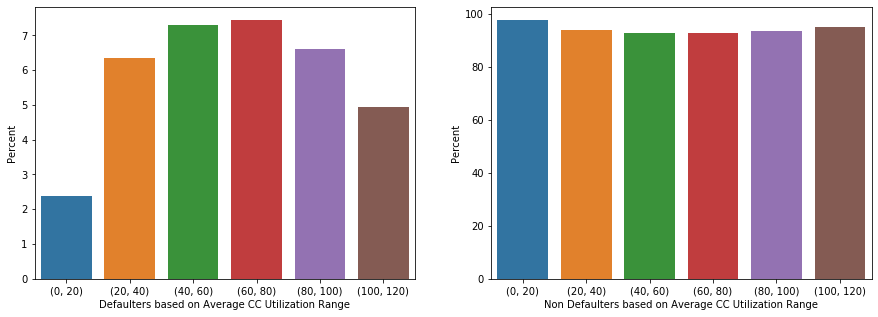

In [70]:
binned_weights = []
binrange = [(0,20),(20,40),(40,60),(60,80),(80,100),(100,120)]
for value in cDataFx['AVG_CC_UTIL_INLAS12M']:
    bin_index = find_bin(value,binrange)
    binned_weights.append(bin_index)

cAvgPT = cDataFx[['AVG_CC_UTIL_INLAS12M','PERF_TAG']]
cAvgPT['AVG_BIN'] = binned_weights

cAvg = getDefaultPopulationPercent('AVG_BIN', cAvgPT)

plt.figure(figsize=(15, 5))
## Top 3 
plt.subplot(1,2,1)
ax = sns.barplot(x="AVG_BIN", y="% of Default", data=cAvg)
ax.set(ylabel="Percent")
ax.set(xlabel="Defaulters based on Average CC Utilization Range")
plt.subplot(1,2,2)
ax = sns.barplot(x="AVG_BIN", y="% of Non Default", data=cAvg)
ax.set(ylabel="Percent")
ax.set(xlabel="Non Defaulters based on Average CC Utilization Range")
plt.show()

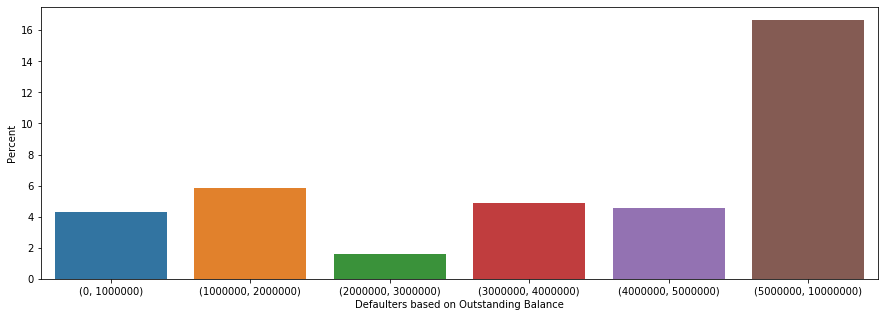

In [71]:
#cAIN12M = getDefaultPopulationPercent('AVG_CC_UTIL_INLAS12M', cDataFx)
#cOUTBAL = getDefaultPopulationPercent('OUT_BAL', cDataFx)

binned_weights = []
binrange = [(0,1000000),(1000000,2000000),(2000000,3000000),(3000000,4000000),(4000000,5000000),(5000000,10000000)]
for value in cDataFx['OUT_BAL']:
    bin_index = find_bin(value,binrange)
    binned_weights.append(bin_index)

cOBPT = cDataFx[['OUT_BAL','PERF_TAG']]
cOBPT['OB_BIN'] = binned_weights

cOB = getDefaultPopulationPercent('OB_BIN', cOBPT)

plt.figure(figsize=(15, 5))
## Top 3 
ax = sns.barplot(x="OB_BIN", y="% of Default", data=cOB)
ax.set(ylabel="Percent")
ax.set(xlabel="Defaulters based on Outstanding Balance")
plt.show()

### Customers who has Outstanding balance less than or equal to 1000000 have more potential of getting defualt.

### Calculating Defaulters based on group population.

In [72]:
cHML = getDefaultPopulationPercent('PRSNC_OPN_HOME_LOAN', cDataFx)
cAL = getDefaultPopulationPercent('PRSNC_OPN_AUTO_LOAN', cDataFx)

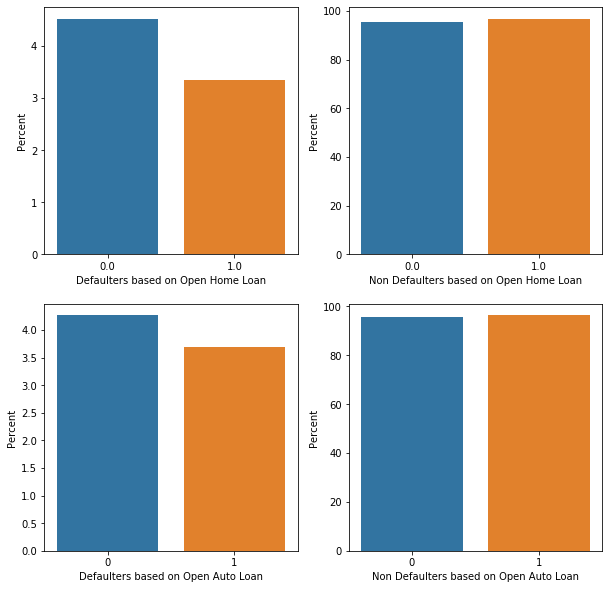

In [73]:
plt.figure(figsize=(10, 10))
## Top 3 
plt.subplot(2,2,1)
ax = sns.barplot(x="PRSNC_OPN_HOME_LOAN", y="% of Default", data=cHML)
ax.set(ylabel="Percent")
ax.set(xlabel="Defaulters based on Open Home Loan")
plt.subplot(2,2,2)
ax = sns.barplot(x="PRSNC_OPN_HOME_LOAN", y="% of Non Default", data=cHML)
ax.set(ylabel="Percent")
ax.set(xlabel="Non Defaulters based on Open Home Loan")

plt.subplot(2,2,3)
ax = sns.barplot(x="PRSNC_OPN_AUTO_LOAN", y="% of Default", data=cAL)
ax.set(ylabel="Percent")
ax.set(xlabel="Defaulters based on Open Auto Loan")
plt.subplot(2,2,4)
ax = sns.barplot(x="PRSNC_OPN_AUTO_LOAN", y="% of Non Default", data=cAL)
ax.set(ylabel="Percent")
ax.set(xlabel="Non Defaulters based on Open Auto Loan")
plt.show()

### We notice that home loan or Auto loan is not impacting people getting default since its 4% defaulters have no Home or Auto and 3.6% with having Home or Auto.

In [74]:
# You can also observe the correlation between the currencies 
# using df.corr()
cor = cDataFx.corr()
round(cor, 3)

,AID,NUM_90DPD_INLAS6M,NUM_60DPD_INLAS6M,NUM_30DPD_INLAS6M,NUM_90DPD_INLAS12M,NUM_60DPD_INLAS12M,NUM_30DPD_INLAS12M,AVG_CC_UTIL_INLAS12M,NUM_TRAD_LAS6M,NUM_TRAD_LAS12M,NUM_PL_TRAD_LAS6M,NUM_PL_TRAD_LAS12M,NUM_OF_INQ_LAS6M,NUM_OF_INQ_LAS12M,PRSNC_OPN_HOME_LOAN,OUT_BAL,TOT_NUM_TRD,PRSNC_OPN_AUTO_LOAN,PERF_TAG
AID,1.000,-0.004,-0.000,-0.000,-0.001,0.001,-0.000,0.002,0.001,-0.000,-0.001,-0.002,-0.000,-0.001,0.000,-0.000,0.002,0.007,0.002
NUM_90DPD_INLAS6M,-0.004,1.000,0.887,0.841,0.889,0.818,0.796,0.355,0.136,0.171,0.247,0.274,0.138,0.152,-0.114,-0.023,0.031,-0.028,0.089
NUM_60DPD_INLAS6M,-0.000,0.887,1.000,0.952,0.844,0.925,0.903,0.350,0.151,0.189,0.266,0.296,0.153,0.169,-0.120,-0.023,0.037,-0.030,0.096
NUM_30DPD_INLAS6M,-0.000,0.841,0.952,1.000,0.830,0.901,0.951,0.350,0.160,0.200,0.279,0.311,0.164,0.182,-0.124,-0.022,0.041,-0.031,0.103
NUM_90DPD_INLAS12M,-0.001,0.889,0.844,0.830,1.000,0.806,0.802,0.383,0.153,0.193,0.276,0.307,0.159,0.176,-0.126,-0.024,0.035,-0.033,0.099
NUM_60DPD_INLAS12M,0.001,0.818,0.925,0.901,0.806,1.000,0.899,0.342,0.127,0.163,0.248,0.275,0.128,0.142,-0.111,-0.021,0.007,-0.025,0.094
NUM_30DPD_INLAS12M,-0.000,0.796,0.903,0.951,0.802,0.899,1.000,0.344,0.137,0.176,0.261,0.290,0.140,0.156,-0.114,-0.019,0.014,-0.025,0.102
AVG_CC_UTIL_INLAS12M,0.002,0.355,0.350,0.350,0.383,0.342,0.344,1.000,0.090,0.132,0.244,0.269,0.086,0.095,-0.129,-0.029,-0.009,-0.041,0.080
NUM_TRAD_LAS6M,0.001,0.136,0.151,0.160,0.153,0.127,0.137,0.090,1.000,0.940,0.876,0.834,0.667,0.732,-0.120,0.172,0.888,-0.042,0.051
NUM_TRAD_LAS12M,-0.000,0.171,0.189,0.200,0.193,0.163,0.176,0.132,0.940,1.000,0.890,0.933,0.717,0.786,-0.136,0.191,0.940,-0.048,0.060


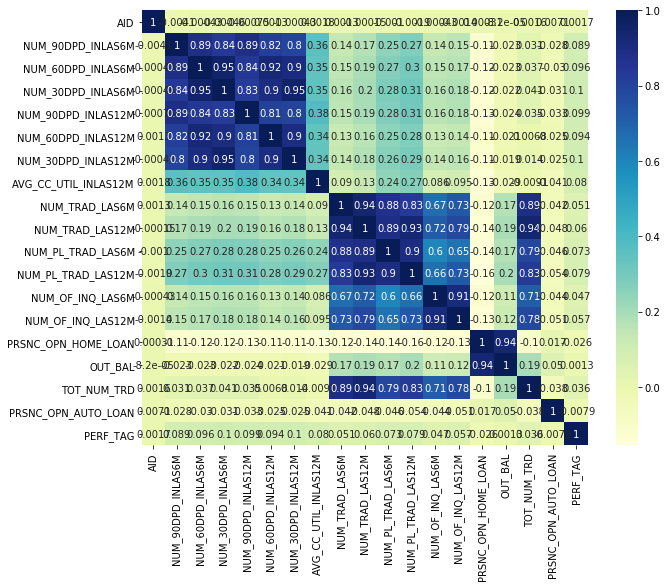

In [75]:
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

### We can notice their is high correlation between few variables.

In [76]:
corrstk = cor.where(np.triu(np.ones(cor.shape), k=1).astype(np.bool))
corrstk = corrstk.unstack().transpose().sort_values(ascending=False).dropna()
corrstk.head()

NUM_30DPD_INLAS6M   NUM_60DPD_INLAS6M      0.952049
NUM_30DPD_INLAS12M  NUM_30DPD_INLAS6M      0.950686
NUM_TRAD_LAS12M     NUM_TRAD_LAS6M         0.939855
TOT_NUM_TRD         NUM_TRAD_LAS12M        0.939565
OUT_BAL             PRSNC_OPN_HOME_LOAN    0.935517
dtype: float64

In [77]:
### Lets drop high correlated variables.
dropCorrColumns = ['NUM_30DPD_INLAS6M','NUM_TRAD_LAS12M','NUM_PL_TRAD_LAS12M','NUM_60DPD_INLAS12M']

cDataFx.drop(dropCorrColumns, axis=1, inplace=True)

# You can also observe the correlation between the currencies 
cor = cDataFx.corr()
round(cor, 3)

,AID,NUM_90DPD_INLAS6M,NUM_60DPD_INLAS6M,NUM_90DPD_INLAS12M,NUM_30DPD_INLAS12M,AVG_CC_UTIL_INLAS12M,NUM_TRAD_LAS6M,NUM_PL_TRAD_LAS6M,NUM_OF_INQ_LAS6M,NUM_OF_INQ_LAS12M,PRSNC_OPN_HOME_LOAN,OUT_BAL,TOT_NUM_TRD,PRSNC_OPN_AUTO_LOAN,PERF_TAG
AID,1.000,-0.004,-0.000,-0.001,-0.000,0.002,0.001,-0.001,-0.000,-0.001,0.000,-0.000,0.002,0.007,0.002
NUM_90DPD_INLAS6M,-0.004,1.000,0.887,0.889,0.796,0.355,0.136,0.247,0.138,0.152,-0.114,-0.023,0.031,-0.028,0.089
NUM_60DPD_INLAS6M,-0.000,0.887,1.000,0.844,0.903,0.350,0.151,0.266,0.153,0.169,-0.120,-0.023,0.037,-0.030,0.096
NUM_90DPD_INLAS12M,-0.001,0.889,0.844,1.000,0.802,0.383,0.153,0.276,0.159,0.176,-0.126,-0.024,0.035,-0.033,0.099
NUM_30DPD_INLAS12M,-0.000,0.796,0.903,0.802,1.000,0.344,0.137,0.261,0.140,0.156,-0.114,-0.019,0.014,-0.025,0.102
AVG_CC_UTIL_INLAS12M,0.002,0.355,0.350,0.383,0.344,1.000,0.090,0.244,0.086,0.095,-0.129,-0.029,-0.009,-0.041,0.080
NUM_TRAD_LAS6M,0.001,0.136,0.151,0.153,0.137,0.090,1.000,0.876,0.667,0.732,-0.120,0.172,0.888,-0.042,0.051
NUM_PL_TRAD_LAS6M,-0.001,0.247,0.266,0.276,0.261,0.244,0.876,1.000,0.596,0.653,-0.143,0.173,0.788,-0.046,0.073
NUM_OF_INQ_LAS6M,-0.000,0.138,0.153,0.159,0.140,0.086,0.667,0.596,1.000,0.911,-0.121,0.108,0.714,-0.044,0.047
NUM_OF_INQ_LAS12M,-0.001,0.152,0.169,0.176,0.156,0.095,0.732,0.653,0.911,1.000,-0.133,0.119,0.782,-0.051,0.057


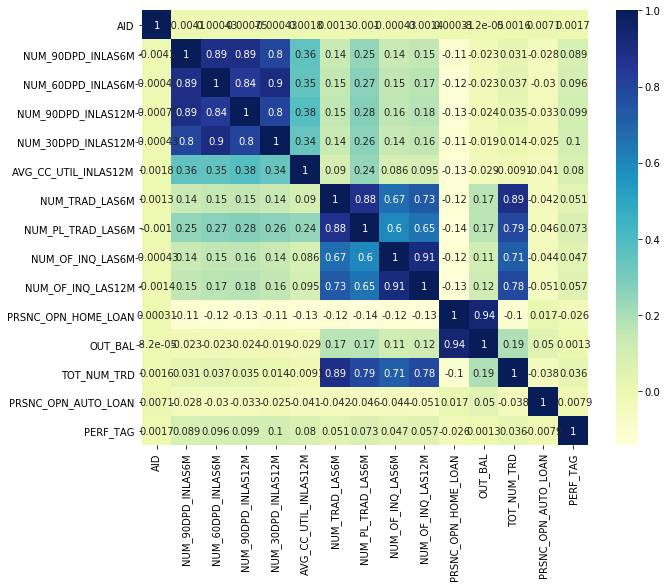

In [78]:
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [79]:
### Lets drop high correlated variables.
dropCorrColumns = ['NUM_TRAD_LAS6M','NUM_PL_TRAD_LAS6M','NUM_OF_INQ_LAS6M','NUM_OF_INQ_LAS12M','PRSNC_OPN_HOME_LOAN','NUM_90DPD_INLAS6M','NUM_90DPD_INLAS12M','NUM_30DPD_INLAS12M']

cDataFx.drop(dropCorrColumns, axis=1, inplace=True)

# You can also observe the correlation between the currencies 
cor = cDataFx.corr()
round(cor, 3)

,AID,NUM_60DPD_INLAS6M,AVG_CC_UTIL_INLAS12M,OUT_BAL,TOT_NUM_TRD,PRSNC_OPN_AUTO_LOAN,PERF_TAG
AID,1.000,-0.000,0.002,-0.000,0.002,0.007,0.002
NUM_60DPD_INLAS6M,-0.000,1.000,0.350,-0.023,0.037,-0.030,0.096
AVG_CC_UTIL_INLAS12M,0.002,0.350,1.000,-0.029,-0.009,-0.041,0.080
OUT_BAL,-0.000,-0.023,-0.029,1.000,0.192,0.050,0.001
TOT_NUM_TRD,0.002,0.037,-0.009,0.192,1.000,-0.038,0.036
PRSNC_OPN_AUTO_LOAN,0.007,-0.030,-0.041,0.050,-0.038,1.000,-0.008
PERF_TAG,0.002,0.096,0.080,0.001,0.036,-0.008,1.000


In [80]:
corrstk = cor.where(np.triu(np.ones(cor.shape), k=1).astype(np.bool))
corrstk = corrstk.unstack().transpose().sort_values(ascending=False).dropna()
corrstk

AVG_CC_UTIL_INLAS12M  NUM_60DPD_INLAS6M       0.349543
TOT_NUM_TRD           OUT_BAL                 0.192454
PERF_TAG              NUM_60DPD_INLAS6M       0.096404
                      AVG_CC_UTIL_INLAS12M    0.080406
PRSNC_OPN_AUTO_LOAN   OUT_BAL                 0.050273
TOT_NUM_TRD           NUM_60DPD_INLAS6M       0.037265
PERF_TAG              TOT_NUM_TRD             0.035537
PRSNC_OPN_AUTO_LOAN   AID                     0.007074
AVG_CC_UTIL_INLAS12M  AID                     0.001775
PERF_TAG              AID                     0.001668
TOT_NUM_TRD           AID                     0.001586
PERF_TAG              OUT_BAL                 0.001280
OUT_BAL               AID                    -0.000082
NUM_60DPD_INLAS6M     AID                    -0.000430
PERF_TAG              PRSNC_OPN_AUTO_LOAN    -0.007935
TOT_NUM_TRD           AVG_CC_UTIL_INLAS12M   -0.009148
OUT_BAL               NUM_60DPD_INLAS6M      -0.022765
                      AVG_CC_UTIL_INLAS12M   -0.028968
PRSNC_OPN_

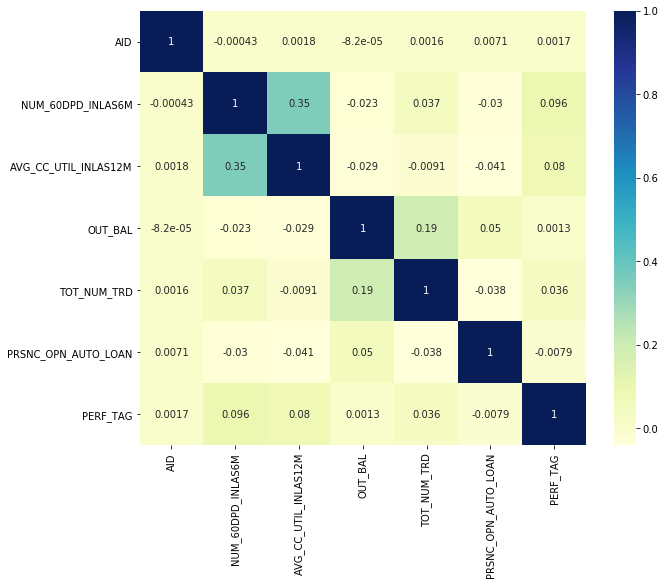

In [81]:
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

### We removed all corellation present between the variables

### Final Demographics and Credit Bureau Data after all data fixes.

In [82]:
dDataFl = dDataFx
cDataFl = cDataFx

In [83]:
print('Applications which is in Credit Data and not in Demographics Data = ' + str(len(list(set(cDataFl['AID']) - set(dDataFl['AID'])))))
print('Applications which is in Demographics Data and not in Credit Data = ' + str(len(list(set(dDataFl['AID']) - set(cDataFl['AID'])))))

Applications which is in Credit Data and not in Demographics Data = 205
Applications which is in Demographics Data and not in Credit Data = 1017


### Since we cleaned up the data we have this difference in applications.

In [84]:
cDataFl.columns

Index(['AID', 'NUM_60DPD_INLAS6M', 'AVG_CC_UTIL_INLAS12M', 'OUT_BAL',
       'TOT_NUM_TRD', 'PRSNC_OPN_AUTO_LOAN', 'PERF_TAG'],
      dtype='object')

In [85]:
mData = pd.merge(dDataFl,
                 cDataFl[['AID', 'NUM_60DPD_INLAS6M', 'AVG_CC_UTIL_INLAS12M', 'OUT_BAL',
       'TOT_NUM_TRD', 'PRSNC_OPN_AUTO_LOAN']],
                 on='AID', 
                 how='inner')

In [86]:
mData.columns

Index(['AID', 'AGE', 'GENDER', 'MARITAL_STATUS', 'NUM_OF_DEPTS', 'INCOME',
       'EDUCATION', 'PROFESSION', 'TYPE_OF_RES', 'NUM_OF_MONTHS_CURR_RES',
       'NUM_OF_MONTHS_CURR_COMP', 'PERF_TAG', 'NUM_60DPD_INLAS6M',
       'AVG_CC_UTIL_INLAS12M', 'OUT_BAL', 'TOT_NUM_TRD',
       'PRSNC_OPN_AUTO_LOAN'],
      dtype='object')

In [87]:
### Checking the distribution of data
print("Merged Data Distribution - "+ str(mData.shape) + " And Performance Flag details  ->" + str(mData['PERF_TAG'].value_counts()))

Merged Data Distribution - (68648, 17) And Performance Flag details  ->0.0    65753
1.0     2895
Name: PERF_TAG, dtype: int64


### Previous distribution we had found - (68847, 19) And Performance Flag details  ->0.0    65947 1.0     2900. 
### Comparing above details we have good number of records in merge dataset.

In [88]:
dData.drop(['AID'], 1, inplace = True)
cData.drop(['AID'], 1, inplace = True)

### Creating Dummy Variables

In [89]:
# Creating a dummy variable for the variable 'GENDER'.
gender = pd.get_dummies(dDataFx['GENDER'],prefix='GENDER')
#Adding the results to the master dataframe
dDataFx = pd.concat([dDataFx,gender],axis=1)

# Creating a dummy variable for the variable 'MARITAL_STATUS'.
marital = pd.get_dummies(dDataFx['MARITAL_STATUS'],prefix='MARITAL_STATUS')
#Adding the results to the master dataframe
dDataFx = pd.concat([dDataFx,marital],axis=1)

# Creating a dummy variable for the variable 'NUM_OF_DEPTS'.
depnts = pd.get_dummies(dDataFx['NUM_OF_DEPTS'],prefix='NUM_OF_DEPTS')
#Adding the results to the master dataframe
dDataFx = pd.concat([dDataFx,depnts],axis=1)

# Creating a dummy variable for the variable 'EDUCATION'.
education = pd.get_dummies(dDataFx['EDUCATION'],prefix='EDUCATION')
#Adding the results to the master dataframe
dDataFx = pd.concat([dDataFx,education],axis=1)

# Creating a dummy variable for the variable 'PROFESSION'.
profession = pd.get_dummies(dDataFx['PROFESSION'],prefix='PROFESSION')
#Adding the results to the master dataframe
dDataFx = pd.concat([dDataFx,profession],axis=1)


# Creating a dummy variable for the variable 'TYPE_OF_RES'.
resident = pd.get_dummies(dDataFx['TYPE_OF_RES'],prefix='TYPE_OF_RES')
#Adding the results to the master dataframe
dDataFx = pd.concat([dDataFx,resident],axis=1)
dDataFx.drop(['TYPE_OF_RES','PROFESSION','EDUCATION','NUM_OF_DEPTS','MARITAL_STATUS','GENDER'], axis=1, inplace=True)

# Dropping columns which has less volume
dDataFx.drop(['EDUCATION_Others','PROFESSION_SE','TYPE_OF_RES_Others','GENDER_F','NUM_OF_DEPTS_5.0','MARITAL_STATUS_Single'], axis=1, inplace=True)


In [90]:
dDataFx.columns

dDataFx.columns = ['AID', 'AGE', 'INCOME', 'NUM_OF_MONTHS_CURR_RES',
       'NUM_OF_MONTHS_CURR_COMP', 'PERF_TAG', 'GENDER_M',
       'MARITAL_STATUS_Married', 'NUM_OF_DEPTS_1', 'NUM_OF_DEPTS_2',
       'NUM_OF_DEPTS_3', 'NUM_OF_DEPTS_4', 'EDUCATION_Bachelor',
       'EDUCATION_Masters', 'EDUCATION_Phd', 'EDUCATION_Professional',
       'PROFESSION_SAL', 'PROFESSION_SE_PROF', 'TYPE_OF_RES_Company provided',
       'TYPE_OF_RES_Living with Parents', 'TYPE_OF_RES_Owned',
       'TYPE_OF_RES_Rented']
dDataFx.columns

Index(['AID', 'AGE', 'INCOME', 'NUM_OF_MONTHS_CURR_RES',
       'NUM_OF_MONTHS_CURR_COMP', 'PERF_TAG', 'GENDER_M',
       'MARITAL_STATUS_Married', 'NUM_OF_DEPTS_1', 'NUM_OF_DEPTS_2',
       'NUM_OF_DEPTS_3', 'NUM_OF_DEPTS_4', 'EDUCATION_Bachelor',
       'EDUCATION_Masters', 'EDUCATION_Phd', 'EDUCATION_Professional',
       'PROFESSION_SAL', 'PROFESSION_SE_PROF', 'TYPE_OF_RES_Company provided',
       'TYPE_OF_RES_Living with Parents', 'TYPE_OF_RES_Owned',
       'TYPE_OF_RES_Rented'],
      dtype='object')

In [91]:
cDataFx.columns

Index(['AID', 'NUM_60DPD_INLAS6M', 'AVG_CC_UTIL_INLAS12M', 'OUT_BAL',
       'TOT_NUM_TRD', 'PRSNC_OPN_AUTO_LOAN', 'PERF_TAG'],
      dtype='object')

In [92]:
mDataFx = pd.merge(dDataFx,
                 cDataFx[['AID', 'NUM_60DPD_INLAS6M', 'AVG_CC_UTIL_INLAS12M', 'OUT_BAL',
       'TOT_NUM_TRD', 'PRSNC_OPN_AUTO_LOAN']],
                 on='AID', 
                 how='inner')

In [93]:
### dDataFl - > has Demographics Data after cleaning
### cDataFl - > has Credit Bureau Data after cleaning
### mData -> has merged data for both Demographics and Credit Bureau
### dDataFx -> Demographics data with dummies
### cDataFx -> Credit Bureau data with dummies
### mDataFx -> has merged data for both Demographics and Credit Bureau Data with dummies 

### Weight of Evidence and Information Value on datasets

In [94]:
### Performing WOE on Demographics Data
dData_Woe=dDataFl

In [95]:
# To understand the behaviour of people with age, we are going to bucket the age groups into brackets of 10 and 
# study the response rates
def add_woe(data, target,cols,cus_bins):
  #Extract Column Names
    ivars = cols
    #print (ivars)
    no_of_bins=10
    if (data[ivars].dtype.kind in 'bifc'):
        if len(cus_bins) == 0:
            binned_x = pd.qcut(data[ivars], no_of_bins,  duplicates='drop')
        else:
            binned_x = pd.cut(data[ivars], cus_bins,  duplicates='drop')
            
            
        bins=pd.DataFrame(binned_x)
        bins.columns = [ivars+'_Bins'] 
        data=pd.concat([data,bins], axis=1)
        d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
    else:
        d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})

    d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
    d.columns = [ivars+'_Cutoff', 'N', 'Events']
    d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
    d['Non-Events'] = d['N'] - d['Events']
    d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()     
    d[ivars+'_WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
    d['% of Default'] = d['Events'] / (d['Events'] +d['Non-Events'])
    d['IV'] = d[ivars+'_WoE'] * (d['% of Events'] - d['% of Non-Events'])
    print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
    if (data[ivars].dtype.kind in 'bifc'):
        data=data.merge(d[[ivars+'_Cutoff',ivars+'_WoE']], left_on=ivars+'_Bins', right_on=ivars+'_Cutoff', how='outer')
    else:
        data=data.merge(d[[ivars+'_Cutoff',ivars+'_WoE']], left_on=ivars, right_on=ivars+'_Cutoff', how='outer')
    ret_data=data.drop(columns =[ivars+'_Cutoff',ivars])
    return ret_data,d



In [96]:
dData_Woe.columns

Index(['AID', 'AGE', 'GENDER', 'MARITAL_STATUS', 'NUM_OF_DEPTS', 'INCOME',
       'EDUCATION', 'PROFESSION', 'TYPE_OF_RES', 'NUM_OF_MONTHS_CURR_RES',
       'NUM_OF_MONTHS_CURR_COMP', 'PERF_TAG'],
      dtype='object')

In [97]:
dData_Woe,AGE_Woe=add_woe(dData_Woe, 'PERF_TAG','AGE',[])
dData_Woe,GENDER_Woe=add_woe(dData_Woe, 'PERF_TAG','GENDER',[])
dData_Woe,MARITAL_STATUS_Woe=add_woe(dData_Woe, 'PERF_TAG','MARITAL_STATUS',[])
dData_Woe,NUM_OF_DEPTS_Woe=add_woe(dData_Woe, 'PERF_TAG','NUM_OF_DEPTS',[])
dData_Woe,INCOME_Woe=add_woe(dData_Woe, 'PERF_TAG','INCOME',[])
dData_Woe,EDUCATION_Woe=add_woe(dData_Woe, 'PERF_TAG','EDUCATION',[])
dData_Woe,PROFESSION_Woe=add_woe(dData_Woe, 'PERF_TAG','PROFESSION',[])
dData_Woe,TYPE_OF_RES_Woe=add_woe(dData_Woe, 'PERF_TAG','TYPE_OF_RES',[])
dData_Woe,NUM_OF_MONTHS_CURR_RES_Woe=add_woe(dData_Woe, 'PERF_TAG','NUM_OF_MONTHS_CURR_RES',[])
dData_Woe,NUM_OF_MONTHS_CURR_COMP_Woe=add_woe(dData_Woe, 'PERF_TAG','NUM_OF_MONTHS_CURR_COMP',[])


Information value of AGE is 0.004103
Information value of GENDER is 0.000324
Information value of MARITAL_STATUS is 0.000104
Information value of NUM_OF_DEPTS is 0.000901
Information value of INCOME is 0.042766
Information value of EDUCATION is 0.000769
Information value of PROFESSION is 0.002355
Information value of TYPE_OF_RES is 0.000899
Information value of NUM_OF_MONTHS_CURR_RES is 0.070644
Information value of NUM_OF_MONTHS_CURR_COMP is 0.022758


In [98]:
dData_Woe.drop(columns=['AGE_Bins','NUM_OF_DEPTS_Bins','INCOME_Bins','NUM_OF_MONTHS_CURR_RES_Bins','NUM_OF_MONTHS_CURR_COMP_Bins'],inplace=True)
dData_Woe.columns
dData_Woe.head()


,AID,PERF_TAG,AGE_WoE,GENDER_WoE,MARITAL_STATUS_WoE,NUM_OF_DEPTS_WoE,INCOME_WoE,EDUCATION_WoE,PROFESSION_WoE,TYPE_OF_RES_WoE,NUM_OF_MONTHS_CURR_RES_WoE,NUM_OF_MONTHS_CURR_COMP_WoE
0,954457215,0.0,0.033678,0.032041,-0.004259,-0.019242,-0.275750,0.016257,-0.028082,-0.004026,-0.068693,-0.229893
1,216285340,0.0,0.048437,-0.010110,0.024306,-0.019242,-0.275750,0.016257,-0.028082,-0.004026,-0.068693,-0.229893
2,373802765,0.0,0.032723,-0.010110,-0.004259,-0.019242,-0.168017,0.016257,-0.028082,-0.004026,-0.068693,-0.229893
3,435803537,0.0,-0.148444,-0.010110,-0.004259,-0.019242,-0.168017,0.016257,-0.028082,-0.004026,-0.068693,-0.229893
4,579584610,0.0,0.070606,-0.010110,-0.004259,-0.019242,-0.168017,0.016257,-0.028082,-0.004026,-0.068693,-0.229893


## Building model for Demographics Data with WOE Values 

In [99]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split
# scaling the features
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [100]:
## Putting feature variable to X
x = dData_Woe.drop(['PERF_TAG','AID'],axis=1)

# Putting response variable to y
y = dData_Woe['PERF_TAG']

scale = StandardScaler(copy=True, with_mean=True, with_std=True)
cols = x.columns
x = pd.DataFrame(scale.fit_transform(x))
x.columns = cols
x.columns

Index(['AGE_WoE', 'GENDER_WoE', 'MARITAL_STATUS_WoE', 'NUM_OF_DEPTS_WoE',
       'INCOME_WoE', 'EDUCATION_WoE', 'PROFESSION_WoE', 'TYPE_OF_RES_WoE',
       'NUM_OF_MONTHS_CURR_RES_WoE', 'NUM_OF_MONTHS_CURR_COMP_WoE'],
      dtype='object')

In [101]:
# Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

## Fixing Imbalance

In [102]:
#Befor fixing Imbalance 
print("Number of Records X_train dataset: ", x_train.shape)
print("Number of Records y_train dataset: ", y_train.shape)
print("Number of Records X_test dataset: ", x_test.shape)
print("Number of Records y_test dataset: ", y_test.shape)

Number of Records X_train dataset:  (48761, 10)
Number of Records y_train dataset:  (48761,)
Number of Records X_test dataset:  (20898, 10)
Number of Records y_test dataset:  (20898,)


In [103]:
print("counts of defaulter: ",(str(sum(y_train==1))))
print("counts of non non defaulter: ",(str(sum(y_train==0))))

counts of defaulter:  2087
counts of non non defaulter:  46674


In [104]:
sm = SMOTE(random_state=2)
x_train_bal, y_train_bal = sm.fit_sample(x_train, y_train)

In [105]:
print('After OverSampling, the shape of train_X: {}'.format(x_train_bal.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_bal.shape))
print("counts of defaulter after OverSampling: {}".format(sum(y_train_bal==1)))
print("counts of non defaulter after OverSampling: {}".format(sum(y_train_bal==0)))

After OverSampling, the shape of train_X: (93348, 10)
After OverSampling, the shape of train_y: (93348,) 

counts of defaulter after OverSampling: 46674
counts of non defaulter after OverSampling: 46674


In [106]:
x_train_bal=pd.DataFrame(x_train_bal)
x_train_bal.columns=x_train.columns
x_train=x_train_bal
y_train=y_train_bal

## Logistic Regression 

In [107]:
# Logistic regression model
# Logistic regression model
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logm1 = sm.GLM(y_train,(sm.add_constant(x_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                93348
Model:                            GLM   Df Residuals:                    93337
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -63209.
Date:                Thu, 19 Dec 2019   Deviance:                   1.2642e+05
Time:                        22:52:03   Pearson chi2:                 9.33e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.0593      0.007     -8.797      0.000      -0.073      -0.046
AGE_WoE                         0.0730      0.007     10.570      0.000       0.059       0.087
GENDER_WoE                      0.0194      0.007      2.932      0.003       0.006       0.032
MARITAL_STATUS_WoE             -0.0104      0.007     -1.557      0.119      -0.024       0.003
NUM_OF_DEPTS_WoE                0.0118      0.007      1.776      0.076      -0.001       0.025
INCOME_WoE                      0.1980      0.007     28.166      0.000       0.184       0.212
EDUCATION_WoE                   0.0158      0.007      2.225      0.026       0.002       0.030
PROFESSION_WoE                  0.0266      0.007      4.027      0.000       0.014       0.040
TYPE_OF_RES_WoE                 0.0226      0.007      3.079      0.002       0.008       0.037
NUM_OF_MONTHS_CURR_RES_WoE      0.2057      0.007     31.222      0.000       0.193       0.219
NUM_OF_MONTHS_CURR_COMP_WoE     0.1635      0.007     23.746      0.000       0.150       0.177
===============================================================================================
"""

In [108]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
col = x_train.columns.tolist()
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,INCOME_WoE,1.04
8,NUM_OF_MONTHS_CURR_RES_WoE,1.04
0,AGE_WoE,1.01
2,MARITAL_STATUS_WoE,1.01
9,NUM_OF_MONTHS_CURR_COMP_WoE,1.01
1,GENDER_WoE,1.00
3,NUM_OF_DEPTS_WoE,1.00
5,EDUCATION_WoE,1.00
6,PROFESSION_WoE,1.00
7,TYPE_OF_RES_WoE,1.00


In [109]:
#Removing MARITAL_STATUS_WoE as its P value in high
col.remove('MARITAL_STATUS_WoE')
x_train_sm = sm.add_constant(x_train[col])
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                93348
Model:                            GLM   Df Residuals:                    93338
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -63210.
Date:                Thu, 19 Dec 2019   Deviance:                   1.2642e+05
Time:                        22:52:04   Pearson chi2:                 9.33e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.0592      0.007     -8.784      0.000      -0.072      -0.046
AGE_WoE                         0.0723      0.007     10.493      0.000       0.059       0.086
GENDER_WoE                      0.0194      0.007      2.922      0.003       0.006       0.032
NUM_OF_DEPTS_WoE                0.0118      0.007      1.778      0.075      -0.001       0.025
INCOME_WoE                      0.1978      0.007     28.150      0.000       0.184       0.212
EDUCATION_WoE                   0.0158      0.007      2.228      0.026       0.002       0.030
PROFESSION_WoE                  0.0266      0.007      4.029      0.000       0.014       0.040
TYPE_OF_RES_WoE                 0.0222      0.007      3.025      0.002       0.008       0.037
NUM_OF_MONTHS_CURR_RES_WoE      0.2054      0.007     31.194      0.000       0.193       0.218
NUM_OF_MONTHS_CURR_COMP_WoE     0.1635      0.007     23.756      0.000       0.150       0.177
===============================================================================================
"""

In [110]:
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,INCOME_WoE,1.04
7,NUM_OF_MONTHS_CURR_RES_WoE,1.04
0,AGE_WoE,1.01
8,NUM_OF_MONTHS_CURR_COMP_WoE,1.01
1,GENDER_WoE,1.00
2,NUM_OF_DEPTS_WoE,1.00
4,EDUCATION_WoE,1.00
5,PROFESSION_WoE,1.00
6,TYPE_OF_RES_WoE,1.00


In [111]:
#Removing NUM_OF_DEPTS_WoE as its P value in high
col.remove('NUM_OF_DEPTS_WoE')
x_train_sm = sm.add_constant(x_train[col])
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                93348
Model:                            GLM   Df Residuals:                    93339
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -63211.
Date:                Thu, 19 Dec 2019   Deviance:                   1.2642e+05
Time:                        22:52:05   Pearson chi2:                 9.33e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.0591      0.007     -8.771      0.000      -0.072      -0.046
AGE_WoE                         0.0723      0.007     10.499      0.000       0.059       0.086
GENDER_WoE                      0.0192      0.007      2.903      0.004       0.006       0.032
INCOME_WoE                      0.1982      0.007     28.206      0.000       0.184       0.212
EDUCATION_WoE                   0.0160      0.007      2.246      0.025       0.002       0.030
PROFESSION_WoE                  0.0265      0.007      4.014      0.000       0.014       0.039
TYPE_OF_RES_WoE                 0.0223      0.007      3.039      0.002       0.008       0.037
NUM_OF_MONTHS_CURR_RES_WoE      0.2053      0.007     31.181      0.000       0.192       0.218
NUM_OF_MONTHS_CURR_COMP_WoE     0.1634      0.007     23.737      0.000       0.150       0.177
===============================================================================================
"""

In [112]:
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,INCOME_WoE,1.04
6,NUM_OF_MONTHS_CURR_RES_WoE,1.04
0,AGE_WoE,1.01
7,NUM_OF_MONTHS_CURR_COMP_WoE,1.01
1,GENDER_WoE,1.00
3,EDUCATION_WoE,1.00
4,PROFESSION_WoE,1.00
5,TYPE_OF_RES_WoE,1.00


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [113]:
y_train_pred = res.predict(x_train_sm).values.reshape(-1)

In [114]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final = pd.DataFrame({'actual':np.array(y_train,dtype=int), 'prob':y_train_pred})
y_train_pred_final['pred'] = y_train_pred_final.prob.map(lambda x: 1 if x > 0.5 else 0)

In [115]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.actual, y_train_pred_final.pred))

0.5738312550884861


In [116]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.actual, y_train_pred_final.pred)
confusion

array([[27235, 19439],
       [20343, 26331]], dtype=int64)

In [117]:
## Metrics beyond simply accuracy
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print('sensitivity=' + str(TP / float(TP+FN)))
# Let us calculate specificity
print('specificity=' + str(TN / float(TN+FP)))
# Calculate false postive rate - predicting default when customer did not default
print('false postive rate =' +str(FP/ float(TN+FP)))
# positive predictive value 
print ('positive predictive =' +str(TP / float(TP+FP)))
# Negative predictive value
print ( 'Negative predictive =' + str(TN / float(TN+ FN)))

sensitivity=0.5641470626044479
specificity=0.5835154475725243
false postive rate =0.4164845524274757
positive predictive =0.5752894909329255
Negative predictive =0.5724284333095128


In [118]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [119]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.actual, y_train_pred_final.pred, drop_intermediate = False )

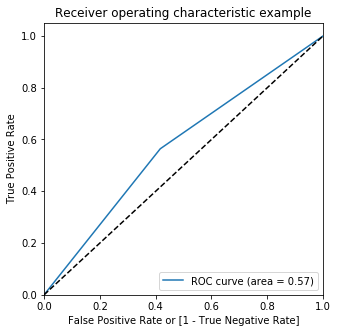

In [120]:
draw_roc(y_train_pred_final.actual, y_train_pred_final.pred)

### We can clearly notice that  with Demographics data the area covered is very less. Further accuracy (57%), sensitivity (56%)  and specificity (58%)  is also low 

In [121]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability Cutoff','accuracy obtained','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.actual, y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability Cutoff  accuracy obtained  sensitivity  specificity
0.0                 0.0           0.500000     1.000000     0.000000
0.1                 0.1           0.500000     1.000000     0.000000
0.2                 0.2           0.500000     1.000000     0.000000
0.3                 0.3           0.502785     0.998393     0.007177
0.4                 0.4           0.536659     0.894267     0.179050
0.5                 0.5           0.573831     0.564147     0.583515
0.6                 0.6           0.543579     0.199833     0.887325
0.7                 0.7           0.501082     0.005935     0.996229
0.8                 0.8           0.500000     0.000000     1.000000
0.9                 0.9           0.500000     0.000000     1.000000


### Trying SVM Model

In [122]:
from sklearn.svm import SVC

In [123]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(x_train, y_train)

# predict
y_pred = model_linear.predict(x_test)


In [124]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.626949947363384 

[[12674  7369]
 [  427   428]]


In [ ]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(x_train, y_train)

# predict
y_pred = non_linear_model.predict(x_test)

In [ ]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

In [ ]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.actual, y_train_pred_final.pred)
confusion

In [ ]:
## Metrics beyond simply accuracy
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print('sensitivity=' + str(TP / float(TP+FN)))
# Let us calculate specificity
print('specificity=' + str(TN / float(TN+FP)))
# Calculate false postive rate - predicting default when customer did not default
print('false postive rate =' +str(FP/ float(TN+FP)))
# positive predictive value 
print ('positive predictive =' +str(TP / float(TP+FP)))
# Negative predictive value
print ( 'Negative predictive =' + str(TN / float(TN+ FN)))

## Grid Search: Hyperparameter Tuning

We tried to run it since we have low infrastructure the GRID Search did not complete. 

## Ridge Regression

In [ ]:
# list of alphas to tune
params = {'alpha': [0.00001, 0.00002, 0.00003, 0.00004,  0.00005, 0.00006, 0.00007, 0.00008,  0.00009, 
                    0.0001, 0.0002, 0.0003, 0.0004,  0.0005, 0.0006, 0.0007, 0.0008,  0.0009, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        n_jobs=-1,
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(x_train, y_train) 

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

In [ ]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [ ]:
lasso = Lasso()

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004,  0.0005, 0.0006, 0.0007, 0.0008,  0.0009, 0.001,  0.002,  0.003,  
                    0.004,  0.005,  0.006,  0.007,  0.008, 0.009,0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(x_train, y_train) 

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

In [ ]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### Building models using merge datasets 

In [ ]:
##  We have derived merged dataset 
mData.head()

In [ ]:
mData_Woe=mData.drop(columns=['AID'],axis=1)

In [ ]:
## Deriving WOE values 
mData_Woe,AGE_Woe=add_woe(mData_Woe, 'PERF_TAG','AGE',[])
mData_Woe,GENDER_Woe=add_woe(mData_Woe, 'PERF_TAG','GENDER',[])
mData_Woe,MARITAL_STATUS_Woe=add_woe(mData_Woe, 'PERF_TAG','MARITAL_STATUS',[])
mData_Woe,NUM_OF_DEPTS_Woe=add_woe(mData_Woe, 'PERF_TAG','NUM_OF_DEPTS',[])
mData_Woe,INCOME_Woe=add_woe(mData_Woe, 'PERF_TAG','INCOME',[])
mData_Woe,EDUCATION_Woe=add_woe(mData_Woe, 'PERF_TAG','EDUCATION',[])
mData_Woe,PROFESSION_Woe=add_woe(mData_Woe, 'PERF_TAG','PROFESSION',[])
mData_Woe,TYPE_OF_RES_Woe=add_woe(mData_Woe, 'PERF_TAG','TYPE_OF_RES',[])
mData_Woe,NUM_OF_MONTHS_CURR_RES_Woe=add_woe(mData_Woe, 'PERF_TAG','NUM_OF_MONTHS_CURR_RES',[])
mData_Woe,NUM_OF_MONTHS_CURR_COMP_Woe=add_woe(mData_Woe, 'PERF_TAG','NUM_OF_MONTHS_CURR_COMP',[])

mData_Woe,NUM_60DPD_INLAS6M_Woe=add_woe(mData_Woe, 'PERF_TAG','NUM_60DPD_INLAS6M',[])
mData_Woe,AVG_CC_UTIL_INLAS12M_Woe=add_woe(mData_Woe, 'PERF_TAG','AVG_CC_UTIL_INLAS12M',[])
mData_Woe,OUT_BAL_Woe=add_woe(mData_Woe, 'PERF_TAG','OUT_BAL',[])
mData_Woe,TOT_NUM_TRD_Woe=add_woe(mData_Woe, 'PERF_TAG','TOT_NUM_TRD',[])
mData_Woe,PRSNC_OPN_AUTO_LOAN_Woe=add_woe(mData_Woe, 'PERF_TAG','PRSNC_OPN_AUTO_LOAN',[])

### We can notice that Average Credit card utilization, Outstanding Balance and Tot number of Trades are good indicators they have good information value.

In [ ]:
mData_Woe.columns
mData_Woe.drop(columns=['AGE_Bins','NUM_OF_DEPTS_Bins','INCOME_Bins','NUM_OF_MONTHS_CURR_RES_Bins','NUM_OF_MONTHS_CURR_COMP_Bins'],inplace=True)
mData_Woe.drop(columns=['PRSNC_OPN_AUTO_LOAN_WoE','NUM_60DPD_INLAS6M_Bins','AVG_CC_UTIL_INLAS12M_Bins','OUT_BAL_Bins','TOT_NUM_TRD_Bins','PRSNC_OPN_AUTO_LOAN_Bins'],inplace=True)
mData_Woe.head()

In [ ]:
## Putting feature variable to X
x = mData_Woe.drop(['PERF_TAG'],axis=1)

# Putting response variable to y
y = mData_Woe['PERF_TAG']


scale = StandardScaler(copy=True, with_mean=True, with_std=True)
cols = x.columns
x = pd.DataFrame(scale.fit_transform(x))
x.columns = cols
x.columns

In [ ]:
# Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

### Fixing Imbalance

In [ ]:
#Befor fixing Imbalance 
print("Number of Records X_train dataset: ", x_train.shape)
print("Number of Records y_train dataset: ", y_train.shape)
print("Number of Records X_test dataset: ", x_test.shape)
print("Number of Records y_test dataset: ", y_test.shape)

In [ ]:
print("counts of defaulter: ",(str(sum(y_train==1))))
print("counts of non non defaulter: ",(str(sum(y_train==0))))

In [ ]:
sm = SMOTE(random_state=2)
x_train_bal, y_train_bal = sm.fit_sample(x_train, y_train)

In [ ]:
print('After OverSampling, the shape of train_X: {}'.format(x_train_bal.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_bal.shape))
print("counts of defaulter after OverSampling: {}".format(sum(y_train_bal==1)))
print("counts of non defaulter after OverSampling: {}".format(sum(y_train_bal==0)))

In [ ]:
# Adding column names
x_train_bal=pd.DataFrame(x_train_bal)
x_train_bal.columns=x_train.columns
x_train=x_train_bal
y_train=y_train_bal

In [ ]:
# Logistic regression model
# Logistic regression model
import statsmodels.api as sm
# Importing LogisticRegression and metrics from sklearn library
from sklearn.linear_model import LogisticRegression
logm1 = sm.GLM(y_train,(sm.add_constant(x_train)), family = sm.families.Binomial())
logm1.fit().summary()

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
col = x_train.columns.tolist()
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
#Removing MARITAL_STATUS_WoE as its P value in high
col.remove('MARITAL_STATUS_WoE')
x_train_sm = sm.add_constant(x_train[col])
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

In [ ]:
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
#Removing NUM_OF_DEPTS_WoE as its P value in high
col.remove('NUM_OF_DEPTS_WoE')
x_train_sm = sm.add_constant(x_train[col])
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

In [ ]:
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
#Removing TYPE_OF_RES_WoE as its P value in high
col.remove('TYPE_OF_RES_WoE')
x_train_sm = sm.add_constant(x_train[col])
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

In [ ]:
#Removing TYPE_OF_RES_WoE as its P value in high
col.remove('PROFESSION_WoE')
x_train_sm = sm.add_constant(x_train[col])
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

In [ ]:
y_train_pred = res.predict(x_train_sm).values.reshape(-1)
y_train=pd.DataFrame(y_train)
y_train.columns=['actual']

In [ ]:
y_train_pred_final = pd.DataFrame({'actual':y_train['actual'], 'prob':y_train_pred})
y_train_pred_final['pred'] = y_train_pred_final.prob.map(lambda x: 1 if x > 0.6 else 0)

In [ ]:
# Let's check the overall accuracy.
print('Accuracy =' + str(metrics.accuracy_score(y_train_pred_final.actual, y_train_pred_final.pred)))

# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.actual, y_train_pred_final.pred)

## Metrics beyond simply accuracy
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print('sensitivity=' + str(TP / float(TP+FN)))
# Let us calculate specificity
print('specificity=' + str(TN / float(TN+FP)))
# Calculate false postive rate - predicting default when customer did not default
print('false postive rate =' +str(FP/ float(TN+FP)))
# positive predictive value 
print ('positive predictive =' +str(TP / float(TP+FP)))
# Negative predictive value
print ( 'Negative predictive =' + str(TN / float(TN+ FN)))

In [ ]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability Cutoff','accuracy obtained','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.actual, y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

### Considering based on data we have we have good accuracy and sensitivity at 0.4. Reducing the risk is always good. Even if we have little low specificity (True negativites) if model detects more defaulters (Sensitivity)

In [ ]:
y_train_pred_final = pd.DataFrame({'actual':y_train['actual'], 'prob':y_train_pred})
y_train_pred_final['pred'] = y_train_pred_final.prob.map(lambda x: 1 if x > 0.4 else 0)

In [ ]:
# Let's check the overall accuracy.
print('Accuracy =' + str(metrics.accuracy_score(y_train_pred_final.actual, y_train_pred_final.pred)))

# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.actual, y_train_pred_final.pred)

## Metrics beyond simply accuracy
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print('sensitivity=' + str(TP / float(TP+FN)))
# Let us calculate specificity
print('specificity=' + str(TN / float(TN+FP)))
# Calculate false postive rate - predicting default when customer did not default
print('false postive rate =' +str(FP/ float(TN+FP)))
# positive predictive value 
print ('positive predictive =' +str(TP / float(TP+FP)))
# Negative predictive value
print ( 'Negative predictive =' + str(TN / float(TN+ FN)))

In [ ]:
### Checking Accuracy on Test Dataset
x_test_sm = sm.add_constant(x_test[col])
y_test_pred = res.predict(x_test_sm).values.reshape(-1)
y_test=pd.DataFrame(y_test)
y_test.columns=['actual']
y_test_pred_final = pd.DataFrame({'actual':y_test['actual'], 'prob':y_test_pred})
y_test_pred_final['pred'] = y_test_pred_final.prob.map(lambda x: 1 if x > 0.4 else 0)

In [ ]:
# Let's check the overall accuracy.
print('Accuracy =' + str(metrics.accuracy_score(y_test_pred_final.actual, y_test_pred_final.pred)))

# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_test_pred_final.actual, y_test_pred_final.pred)

## Metrics beyond simply accuracy
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print('sensitivity=' + str(TP / float(TP+FN)))
# Let us calculate specificity
print('specificity=' + str(TN / float(TN+FP)))
# Calculate false postive rate - predicting default when customer did not default
print('false postive rate =' +str(FP/ float(TN+FP)))
# positive predictive value 
print ('positive predictive =' +str(TP / float(TP+FP)))
# Negative predictive value
print ( 'Negative predictive =' + str(TN / float(TN+ FN)))

## The Accuracy on Test dataset is low but we still have good Sensitivity.

### Lets check Decision Tree and Random Forest.

In [ ]:
rDataInt=cDataFx.drop('PERF_TAG',axis=1)
rData=rDataInt.merge(dDataFx,left_on='AID',right_on='AID',how='inner')
rData.head()

In [ ]:
x = rData.drop(['PERF_TAG','AID'],axis=1)
# Putting response variable to y
y = rData['PERF_TAG']
# Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)
sm = SMOTE(random_state=2)
x_train, y_train = sm.fit_sample(x_train, y_train)


In [ ]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(x_train, y_train)

In [ ]:
# Making predictions
y_pred_train = dt_default.predict(x_train)

# Printing classification report
print(classification_report(y_train, y_pred_train))

In [ ]:
# Making predictions
y_pred_default = dt_default.predict(x_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

### We can notice that the precision and Recall is very low for defaulters on Test dataset set. 

### Random Forest

In [ ]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [ ]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [ ]:
# fit model
rfc.fit(x_train, y_train)

In [ ]:
# predict churn on test data
y_pred = rfc.predict(x_test)

In [ ]:
# Let's check the report of our default model
print(classification_report(y_test,y_pred))

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [3,4,5],
    'n_estimators': [50,100,150,200,250]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1)

In [ ]:
# Fit the grid search to the data
grid_search.fit(x_train, y_train)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

In [ ]:
# model with the best hyperparameters
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             n_estimators=250)

In [ ]:
# fit
rfc.fit(x_train,y_train)
# predict
predictions = rfc.predict(x_train)

print(classification_report(y_train,predictions))

In [ ]:
import statsmodels.api as sm

In [ ]:
predictions = rfc.predict(x_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

### Evaluating the model on Validation Dataset, our model should peridict them as defaulters and should set them to 1.

In [ ]:
# Validation Data -Random Forest
vData =evaDem.merge(evaCre,right_on='AID',left_on='AID',how='inner')

In [ ]:
vData['PERF_TAG']=1
vData.columns

In [ ]:
# Creating a dummy variable for the variable 'GENDER'.
gender = pd.get_dummies(vData['GENDER'],prefix='GENDER')
#Adding the results to the master dataframe
vData = pd.concat([vData,gender],axis=1)

# Creating a dummy variable for the variable 'MARITAL_STATUS'.
marital = pd.get_dummies(vData['MARITAL_STATUS'],prefix='MARITAL_STATUS')
#Adding the results to the master dataframe
vData = pd.concat([vData,marital],axis=1)

# Creating a dummy variable for the variable 'NUM_OF_DEPTS'.
depnts = pd.get_dummies(vData['NUM_OF_DEPTS'],prefix='NUM_OF_DEPTS')
#Adding the results to the master dataframe
vData = pd.concat([vData,depnts],axis=1)

# Creating a dummy variable for the variable 'EDUCATION'.
education = pd.get_dummies(vData['EDUCATION'],prefix='EDUCATION')
#Adding the results to the master dataframe
vData = pd.concat([vData,education],axis=1)

# Creating a dummy variable for the variable 'PROFESSION'.
profession = pd.get_dummies(vData['PROFESSION'],prefix='PROFESSION')
#Adding the results to the master dataframe
vData = pd.concat([vData,profession],axis=1)


# Creating a dummy variable for the variable 'TYPE_OF_RES'.
resident = pd.get_dummies(vData['TYPE_OF_RES'],prefix='TYPE_OF_RES')
#Adding the results to the master dataframe
vData = pd.concat([vData,resident],axis=1)
vData.drop(['TYPE_OF_RES','PROFESSION','EDUCATION','NUM_OF_DEPTS','MARITAL_STATUS','GENDER'], axis=1, inplace=True)

# Dropping columns which has less volume
vData.drop(['EDUCATION_Others','PROFESSION_SE','TYPE_OF_RES_Others','GENDER_F','NUM_OF_DEPTS_5.0','MARITAL_STATUS_Single'], axis=1, inplace=True)


In [ ]:
vData.columns

In [ ]:
vData.columns=['AID', 'AGE', 'INCOME', 'NUM_OF_MONTHS_CURR_RES',
       'NUM_OF_MONTHS_CURR_COMP', 'PERF_TAG_x', 'NUM_90DPD_INLAS6M',
       'NUM_60DPD_INLAS6M', 'NUM_30DPD_INLAS6M', 'NUM_90DPD_INLAS12M',
       'NUM_60DPD_INLAS12M', 'NUM_30DPD_INLAS12M', 'AVG_CC_UTIL_INLAS12M',
       'NUM_TRAD_LAS6M', 'NUM_TRAD_LAS12M', 'NUM_PL_TRAD_LAS6M',
       'NUM_PL_TRAD_LAS12M', 'NUM_OF_INQ_LAS6M', 'NUM_OF_INQ_LAS12M',
       'PRSNC_OPN_HOME_LOAN', 'OUT_BAL', 'TOT_NUM_TRD', 'PRSNC_OPN_AUTO_LOAN',
       'PERF_TAG_y', 'PERF_TAG', 'GENDER_M', 'MARITAL_STATUS_Married',
       'NUM_OF_DEPTS_1', 'NUM_OF_DEPTS_2', 'NUM_OF_DEPTS_3',
       'NUM_OF_DEPTS_4', 'EDUCATION_Bachelor', 'EDUCATION_Masters',
       'EDUCATION_Phd', 'EDUCATION_Professional', 'PROFESSION_SAL',
       'PROFESSION_SE_PROF', 'TYPE_OF_RES_Company provided',
       'TYPE_OF_RES_Living with Parents', 'TYPE_OF_RES_Owned',
       'TYPE_OF_RES_Rented']

vData.head()

In [ ]:
vData=vData[rData.columns]

In [ ]:
# fit
## Putting feature variable to X
vData=vData[~vData.isnull().any(axis=1)]
x = vData.drop(['PERF_TAG', 'AID'],axis=1)

# Putting response variable to y
y = vData['PERF_TAG']


In [ ]:
predictions = rfc.predict(x)

print(classification_report(y,predictions))

In [ ]:
print(confusion_matrix(y,predictions))

In [ ]:
vData.head()

### We can notice that The model is able to find 63% accurately.